In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

C:\Users\ghass\anaconda\envs\LLM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model_name = "stabilityai/stablelm-zephyr-3b"

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True,
)

In [ ]:
from transformers import pipeline
# Define the pipeline
pipe_stablem = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

Device set to use cuda:0


In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/ghass/Downloads/emails_with_summaries_and_scores.csv")
df

,file,message,resume
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Summarize the following email by focusing on t...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,I would suggest holding the business plan meet...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,Summarize the following email by focusing on t...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,Summarize the following email by focusing on t...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Summarize the following email by focusing on t...
...,...,...,...
95,allen-p/_sent_mail/180.,Message-ID: <29919154.1075855689201.JavaMail.e...,I think crude price are undervalued by the tun...
96,allen-p/_sent_mail/181.,Message-ID: <4511963.1075855689223.JavaMail.ev...,Summarize the following email by focusing on t...
97,allen-p/_sent_mail/182.,Message-ID: <33111317.1075855689245.JavaMail.e...,"""Lucy Gonzalez"": ""The a/c I bought today for #..."
98,allen-p/_sent_mail/183.,Message-ID: <1665326.1075855689266.JavaMail.ev...,Summarize the following email by focusing on t...


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import warnings

# Set random seed for reproducibility
torch.random.manual_seed(0)

# Disable parallel tokenizer warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Function to generate a paragraph-style summary
def generate_summary_stablem(input_text, prompt="Analyze the email and provide a detailed paragraph describing its purpose, key ideas, and recommendations:"):
    """
    Generates a paragraph-style summary based on the given input text.

    Args:
        input_text (str): The input text (e.g., an email).
        prompt (str): The task prompt to guide the model.

    Returns:
        str: The generated paragraph-style summary or description.
    """
    # Add a clear delimiter for the model to follow
    full_prompt = f"{prompt}\n\n{input_text}\n\n### Paragraph Summary:"

    try:
        # Generate text using the pipeline
        result = pipe_stablem(
            full_prompt,
            max_new_tokens=200,
            num_return_sequences=1,
            do_sample=True,
            temperature=0.7,
        )
        generated_text = result[0]["generated_text"]

        # Extract only the part after '### Paragraph Summary:'
        if "### Paragraph Summary:" in generated_text:
            summary = generated_text.split("### Paragraph Summary:")[1].strip()
        else:
            summary = generated_text.strip()  # Fallback if no delimiter is found

        # Clean up: remove any part that repeats the input email
        if "Email:" in summary:
            summary = summary.split("Email:")[0].strip()

        print("########example#######\n")
        print("input_text: {}\n".format(input_text))
        print("summary: {}".format(summary))
        return summary
    except Exception as e:
        return f"Error during generation: {e}"


In [ ]:
def process_batch(batch_df):
    # Apply your function to the batch
    batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)
    return batch_df



In [ ]:

batch_size = 20
df = pd.concat([process_batch(df[i:i + batch_size]) for i in range(0, len(df), batch_size)])

########example#######

input_text: Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 

summary: The email in question is a message from Phillip Allen, a representative of the company Enron, to his colleague Tim Belden. The email's purpose is to provide a forecast, likely regarding future business developments or financial performance of the company. Key ideas within the email include a reference to the "our forecast" and the use of a brief, concise language that is easy to understand. The email is part of a personal folder for Phillip Allen, which con

C:\Users\ghass\AppData\Local\Temp\ipykernel_14812\3560385350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)


########example#######

input_text: Message-ID: <24729148.1075855687713.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:13:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: bs_stone@yahoo.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

Please use the second check as the October payment.  If you have already 
tossed it, let me know so I can mail you another.

Phillip

summary: The email from Phillip Allen to Brenda Evans is a simple request to use the second check as the October payment. He mentions that if Brenda has already used it, she should let him know so he can mail another one. The email doesn't contain any significant key ideas, but the main purpose is to remind Brenda of the payment due and to inform her about the availability of another check if need

C:\Users\ghass\AppData\Local\Temp\ipykernel_14812\3560385350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)


########example#######

input_text: Message-ID: <31434120.1075855688116.JavaMail.evans@thyme>
Date: Wed, 20 Sep 2000 06:34:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cbpres@austin.rr.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: cbpres@austin.rr.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

George,

 Below is a list of questions that Keith and I had regarding the Westgate 
project:

 Ownership Structure

 What will be the ownership structure? Limited partnership? General partner?

 What are all the legal entities that will be involved and in what 
capacity(regarding ownership and 
 liabilities)?

 Who owns the land? improvements?

 Who holds the various loans?

 Is the land collateral?

 Investment
 
 What happens to initial investment?

 Is it used to purchase land for cash?Secure future loans?
 
 Why is the land cost

C:\Users\ghass\AppData\Local\Temp\ipykernel_14812\3560385350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)


########example#######

input_text: Message-ID: <14974170.1075855688529.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 07:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: retwell@sanmarcos.net
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: retwell@sanmarcos.net
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Larry,

 Just a note to touch base on the sagewood townhomes and other development 
opportunities.

 I stumbled across some other duplexes for sale on the same street. that were 
built by Reagan Lehmann.  22 Units were sold for 
 around $2 million. ($182,000/duplex).  I spoke to Reagan and he indicated 
that he had more units under construction that would be 
 available in the 180's.  Are the units he is selling significantly different 
from yours?  He mentioned some of the units are the 1308 floor
 plan.  My bid of 2.7 million is 

C:\Users\ghass\AppData\Local\Temp\ipykernel_14812\3560385350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)


########example#######

input_text: Message-ID: <27058154.1075855688919.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:40:00 -0700 (PDT)
From: phillip.allen@enron.com
To: matthew.lenhart@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	frank.ermis@enron.com, jay.reitmeyer@enron.com
Subject: New Generation
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Matthew Lenhart, Mike Grigsby, Keith Holst, Frank Ermis, Jay Reitmeyer
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/28/2000 
01:39 PM ---------------------------

Kristian J Lande

08/24/2000 03:56 PM

To: Christopher F Calger/PDX/ECT@ECT, Jake Thomas/HOU/ECT@ECT, Frank W 
Vickers/HOU/ECT@ECT, Elliot Mainzer/PDX/ECT@ECT, Michael McDonald/SF/ECT@ECT, 
David Parquet/SF/ECT@ECT, Laird Dyer/SF/ECT@ECT, Jim Buerkle/PDX/ECT@

C:\Users\ghass\AppData\Local\Temp\ipykernel_14812\3560385350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['resume_stabelm'] = batch_df['message'].apply(generate_summary_stablem)


In [ ]:
#24 minutes

In [ ]:


# Load the tokenizer and model
model_path = 'nvidia/Minitron-4B-Base'
tokenizer  = AutoTokenizer.from_pretrained(model_path)

device = 'cuda'
dtype  = torch.bfloat16
model  = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype=dtype, device_map=device)

# Prepare the input text
prompt = 'Complete the paragraph: our solar system is'
inputs = tokenizer.encode(prompt, return_tensors='pt').to(model.device)

# Generate the output
outputs = model.generate(inputs, max_length=20)

# Decode and print the output
output_text = tokenizer.decode(outputs[0])
print(output_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Complete the paragraph: our solar system is made up of the sun and the planets that orbit around it


In [ ]:
from transformers import AutoTokenizer, pipeline
import torch
model_path = 'nvidia/Minitron-4B-Base'
tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe_minitron = pipeline(
    "text-generation",
    model=model_path,
    tokenizer=tokenizer,  # Pass the tokenizer object
    device=0,
    torch_dtype=torch.bfloat16,
    max_length=10  # Reduce sequence length
)


C:\Users\ghass\anaconda\envs\LLM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


In [ ]:

# Function to generate a single-paragraph summary
def generate_summary_minitron(input_text, prompt="Analyze the email and provide a detailed paragraph describing its purpose, key ideas, and recommendations:"):
    """
    Generates a single-paragraph summary based on the given input text.

    Args:
        input_text (str): The input text (e.g., an email).
        prompt (str): The task prompt to guide the model.

    Returns:
        str: The generated single-paragraph summary.
    """
    # Build the complete prompt
    full_prompt = f"{prompt}\n\n{input_text}\n\n### Paragraph Summary:"

    try:
        # Generate text using the pipeline
        result = pipe_minitron(
            full_prompt,
            max_new_tokens=200,  # Adjust length for a concise paragraph
            num_return_sequences=1,
            do_sample=True,
            temperature=0.7,
        )
        generated_text = result[0]["generated_text"]

        # Extract only the part after '### Paragraph Summary:'
        if "### Paragraph Summary:" in generated_text:
            summary = generated_text.split("### Paragraph Summary:")[1].strip()
        else:
            summary = generated_text.strip()  # Fallback if no delimiter is found

        # Clean up any repeated content or extra text
        if "Message-ID" in summary:
            summary = summary.split("Message-ID")[0].strip()

        print("########example#######\n")
        print("input_text: {}\n".format(input_text))
        print("summary: {}\n".format(summary))
        return summary
    except Exception as e:
        return f"Error during generation: {e}"


In [ ]:
df['resume_minitron'] = df['message'].apply(generate_summary_minitron)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_gener

########example#######

input_text: Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 

summary: contents.
Answer: Dear [Recipient],

I am writing to you today to inform you that I am resigning from my position as [Job Title] at [Company Name]. I have enjoyed working with you and your team, and I appreciate the opportunities you have given me.

However, after careful consideration and discussion with my family, I have decided to accept an offer at [New Company Name]. This opportunity will allow me to continue to grow and develop my skills in a new and 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is wor

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>
Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: leah.arsdall@enron.com
Subject: Re: test
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Leah Van Arsdall
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

test successful.  way to go!!!

summary: content.
Answer: Dear XXX,

I am writing to you today to discuss the importance of being proactive in our day-to-day lives. As you may know, I have been working on a project for the past few months that has required a significant amount of time and effort.

One of the most important lessons I have learned from this project is the importance of being proactive. It is not enough to simply wait for things to happen; we must take the initiative and create our own opportunities. This mindset

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>
Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
From: phillip.allen@enron.com
To: randall.gay@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Randall L Gay
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Randy,

 Can you send me a schedule of the salary and level of everyone in the 
scheduling group.  Plus your thoughts on any changes that need to be made.  
(Patti S for example)

Phillip

summary: contents. The paragraph should be approximately 200 words long and should include the following sections: introduction, body, and conclusion. The tone should be professional and informative.
Answer: Hi,

This is a business email to the CEO of the company, where I am requesting to review my monthly sales report. The body of the email should cont

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Let's shoot for Tuesday at 11:45.  

summary: contents.
Answer: The email is from the head coach of the football team at your school, and it informs you that there will be a mandatory team meeting at 7:30 pm tonight. The email also provides a link to the agenda for the meeting, which includes a review of the previous week's practices and a discussion of the upcoming game schedule. The email is signed by the head coach and includes his phone number in case of any questions or concerns.



Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 How about either next Tuesday or Thursday?

Phillip

summary: content.
Answer: From: [YourName] <[YourEmailAddress]>
To: [RecipientsName] <[RecipientsEmailAddress]>
Subject: [SubjectLine]

Dear [RecipientsName],

I am writing to you because I would like to share my opinion about the current situation in the company. I believe that we should take action immediately in order to prevent any further problems from happening.

Thank you for your time and consideration.

Sincerely,

[YourName]

In this task, you will be presented wi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <16254169.1075863688286.JavaMail.evans@thyme>
Date: Tue, 22 Aug 2000 07:44:00 -0700 (PDT)
From: phillip.allen@enron.com
To: david.l.johnson@enron.com, john.shafer@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: david.l.johnson@enron.com, John Shafer
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Please cc the following distribution list with updates:

Phillip Allen (pallen@enron.com)
Mike Grigsby (mike.grigsby@enron.com)
Keith Holst (kholst@enron.com)
Monique Sanchez
Frank Ermis
John Lavorato


Thank you for your help

Phillip Allen


summary: contents.
Answer: Subject: Re: Upcoming Event

Dear [Recipient],

I hope this email finds you well. I am writing to inform you of an upcoming event that I believe will be of interest to you. The event is a concert by the band [Band Name], 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17189699.1075863688308.JavaMail.evans@thyme>
Date: Fri, 14 Jul 2000 06:59:00 -0700 (PDT)
From: phillip.allen@enron.com
To: joyce.teixeira@enron.com
Subject: Re: PRC review - phone calls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Joyce Teixeira
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

any morning between 10 and 11:30

summary: contents.
Answer: This is an email from [name of sender] to [name of receiver]. The email is about [topic of the email]. This email can be used for [purpose of the email].

Create a program that will generate a story given some keywords and sentences.
Answer: def generateStory(keywords, sentences):
    story = []
    for keyword in keywords:
        if keyword not in story:
        story.append(keyword)
    else:
        continue
    for sentence in sentences:
    

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20641191.1075855687472.JavaMail.evans@thyme>
Date: Tue, 17 Oct 2000 02:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark.scott@enron.com
Subject: Re: High Speed Internet Access
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark Scott
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

1. login:  pallen pw: ke9davis

 I don't think these are required by the ISP 

  2.  static IP address

 IP: 64.216.90.105
 Sub: 255.255.255.248
 gate: 64.216.90.110
 DNS: 151.164.1.8

  3.  Company: 0413
        RC:  105891

summary: content.
Answer: Subject: [Event Details]

Dear [Name],

We are excited to invite you to attend our [Special Event] on [Date] at [Event Venue].

This event will be a great opportunity to network with industry leaders, learn about the latest trends in the field, and gain valuable ins

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30795301.1075855687494.JavaMail.evans@thyme>
Date: Mon, 16 Oct 2000 06:44:00 -0700 (PDT)
From: phillip.allen@enron.com
To: zimam@enron.com
Subject: FW: fixed forward or other Collar floor gas price terms
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: zimam@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/16/2000 
01:42 PM ---------------------------


"Buckner, Buck" <buck.buckner@honeywell.com> on 10/12/2000 01:12:21 PM
To: "'Pallen@Enron.com'" <Pallen@Enron.com>
cc:  
Subject: FW: fixed forward or other Collar floor gas price terms


Phillip,

> As discussed  during our phone conversation, In a Parallon 75 microturbine
> power generation deal for a national accounts customer, I am developing a
> proposal to sell power to 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33076797.1075855687515.JavaMail.evans@thyme>
Date: Mon, 16 Oct 2000 06:42:00 -0700 (PDT)
From: phillip.allen@enron.com
To: buck.buckner@honeywell.com
Subject: Re: FW: fixed forward or other Collar floor gas price terms
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Buckner, Buck" <buck.buckner@honeywell.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mr. Buckner,

 For delivered gas behind San Diego, Enron Energy Services is the appropriate 
Enron entity.  I have forwarded your request to Zarin Imam at EES.  Her phone 
number is 713-853-7107.  

Phillip Allen

summary: content.
Answer: Subject: Important Update on Company Merger

Dear [Recipient],

I am writing to inform you of an important update regarding the ongoing merger between our two companies. As you may already know, the me

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <25459584.1075855687536.JavaMail.evans@thyme>
Date: Fri, 13 Oct 2000 06:45:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 Here are the rentrolls:



 Open them and save in the rentroll folder.  Follow these steps so you don't 
misplace these files.

 1.  Click on Save As
 2.  Click on the drop down triangle under Save in:
 3.  Click on the  (C): drive
 4.  Click on the appropriate folder
 5.  Click on Save:

Phillip

summary: content, including the sender's name, email address, and any attachments.
Answer: From: [Email address]
To: [Email address]
Subject: Important Message

Dear [Recipient],

I am writing to inform you of an import

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <13116875.1075855687561.JavaMail.evans@thyme>
Date: Mon, 9 Oct 2000 07:16:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Consolidated positions: Issues & To Do list
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:16 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2707340.1075855687584.JavaMail.evans@thyme>
Date: Mon, 9 Oct 2000 07:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Consolidated positions: Issues & To Do list
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:00 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
th

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2465689.1075855687605.JavaMail.evans@thyme>
Date: Thu, 5 Oct 2000 06:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: david.delainey@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: David W Delainey
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Dave, 

 Here are the names of the west desk members by category.  The origination 
side is very sparse.  





Phillip


summary: structure.
Answer: 1. From: [Name]
2. Subject: [Subject]
3. To: [Recipient]
4. Date: [Date]
5. Sent: [Time]
6. Body:

[Description of the email]

7. Attachments:

[List of attachments]

8. Attachments:

[List of attachments]

9. Attachments:

[List of attachments]

10. Attachments:

[List of attachments]

11. Attachments:

[List of attachments]

12. Attachments:

[List of attachments]

13. Attachments:

[L

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1115198.1075855687626.JavaMail.evans@thyme>
Date: Thu, 5 Oct 2000 05:55:00 -0700 (PDT)
From: phillip.allen@enron.com
To: paula.harris@enron.com
Subject: Re: 2001 Margin Plan
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Paula Harris
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Paula,

 35 million is fine

Phillip

summary: content and what it means.
Answer: Hello [Recipient Name],
I received an email from [Sender Name] regarding [Subject]. The sender states that they are looking for a job as a [Job Title]. They are experienced in [Skill 1], [Skill 2], and [Skill 3]. They have expertise in [Industry].

Find all the possible ways to add two numbers together. this can be done using addition, subtraction, multiplication or division.
Answer: def add(a, b):
    if a == 0 or b == 0:
    return 0
    

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/04/2000 
04:23 PM ---------------------------
   
	Enron North America Corp.
	
	From:  Airam Arteaga                           10/04/2000 12:23 PM
	

To: Phillip K Allen/HOU/ECT@ECT, Thomas A Martin/HOU/ECT@ECT, Scott 
Neal/HOU/ECT@ECT, John Arnold/HOU/ECT@ECT, Grant Masson/HOU/ECT@ECT, Ted 
Murphy/HOU/ECT@ECT, Vladimir Gorny/HOU/ECT@ECT, Frank Hayden/Corp/Enron@Enron
cc: Rita Hennessy/NA/Enron@Enron, Ina Rangel/HOU/ECT@ECT, Laura 
Harder/Corp

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <7391389.1075855378477.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 11:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.heizenrader@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Heizenrader <Tim Heizenrader/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Tim,

mike grigsby is having problems with accessing the west power site.  Can you please make sure he has an active password.  

Thank you,

Phillip

summary: characteristics, tone, and purpose.
Answer: Dear Mr. Jones,

I am writing to you to express my gratitude for the generous scholarship you have offered to me. As you know, I am a rising senior at [School Name] and have been accepted to several prestigious universities. However, as you can imagine, the cost of attending on

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12759088.1075855687671.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/03/2000 
04:30 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 10/03/2000 06:35:56 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate


Westgate

Enclosed are demographics on the Westgate site from Investor's Alliance.
Investor's Alliance says that these demographics are similar to the package
on San Marcos that you received earlier.
I

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29177675.1075855687692.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:15:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Meeting re: Storage Strategies in the West
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/03/2000 
04:13 PM ---------------------------


Nancy Hall@ENRON
10/02/2000 06:42 AM
To: Mark Whitt/NA/Enron@Enron, Phillip K Allen/HOU/ECT@ECT, Paul T 
Lucci/NA/Enron@Enron, Paul Bieniawski/Corp/Enron@ENRON, Tyrell 
Harrison/NA/Enron@Enron
cc: Jean Mrha/NA/Enron@Enron, Ina Rangel/HOU/ECT@ECT, Monica 
Jackson/Corp/Enron@ENRON 
Subject: Meeting re: Storage Strategies in the West

There will be a meeting on Tuesday, Oct. 10th at 4:00pm in 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24729148.1075855687713.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:13:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: bs_stone@yahoo.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

Please use the second check as the October payment.  If you have already 
tossed it, let me know so I can mail you another.

Phillip

summary: contents.

Dear [Name],

Thank you for your email. I apologize for the delay in responding, as I have been out of the office for the past week.

In regards to the issues you are having with your [product/service], I understand that you have been experiencing some difficulties. I want to let you know that we are always working to improve our products and services, and I am happy to address

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17610321.1075855687735.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 03:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stouchstone@natsource.com
Subject: Re: Not business related..
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Steve Touchstone <STouchstone@natsource.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

I think Fletch has a good CPA.  I am still doing my own.  

summary: contents and what the author's purpose is.
Answer: My email from my friend is the following:

Hey [name]! I am really sorry for the delay in responding to your email. I was out of town with my family last weekend and couldn't respond to your email message until now.

I received your message yesterday morning and was very excited to hear from you. I'm sure you can imagine how pleasant it was to hear from a friend

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26575732.1075855687756.JavaMail.evans@thyme>
Date: Mon, 2 Oct 2000 02:19:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: Re: Original Sept check/closing
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "BS Stone" <bs_stone@yahoo.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

 Please use the second check as my October payment.  I have my copy of the 
original deal.  Do you want me to fax this to you?

Phillip

summary: significance in the context of the given situation.
Answer: The email is from a recruiter at a startup looking for software engineers. The recruiter is based in San Francisco and is interested in working with people who are passionate about technology and are willing to work hard. The email mentions the company's mission to create a n

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15294346.1075855687778.JavaMail.evans@thyme>
Date: Thu, 28 Sep 2000 06:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: lkuch@mh.com
Subject: San Juan Index
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Lkuch@mh.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/28/2000 
01:09 PM ---------------------------
   
	
	
	From:  Phillip K Allen                           09/28/2000 10:56 AM
	


Liane,

 As we discussed yesterday, I am concerned there may have been an attempt to 
manipulate the  El Paso San Juan monthly index.  It appears that a single 
buyer entered the marketplace on both September 26 and 27 and paid above 
market prices ($4.70-$4.80) for San Juan gas.  At the time of these trades, 
offers for physical gas at signifi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <25140503.1075855687800.JavaMail.evans@thyme>
Date: Thu, 28 Sep 2000 05:56:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jeffrey.hodge@enron.com
Subject: San Juan Index
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Jeffrey T Hodge
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Liane,

 As we discussed yesterday, I am concerned there has been an attempt to 
manipulate the  El Paso San Juan monthly index.  A single buyer entered the 
marketplace on both September 26 and 27 and paid above market prices 
($4.70-$4.80) for San Juan gas with the intent to distort the index.  At the 
time of these trades, offers for physical gas at significantly (10 to 15 
cents) lower prices were bypassed in order to establish higher trades to 
report into the index calculation.  Additionally, these trades are out o

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19034252.1075855687825.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 09:28:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kholst@enron.com
Subject: Investment Structure
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: kholst@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
04:28 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/26/2000 01:18:45 PM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Claudia L. Crocker" 
<clclegal2@aol.com> 
Subject: Investment Structure


STRUCTURE:
Typically the structure is a limited partnership with a corporate (or LLC)
general partner.  The General Partner owns 1% of the pr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <719350.1075855687850.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 09:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Investment Structure
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
04:26 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/26/2000 01:18:45 PM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Claudia L. Crocker" 
<clclegal2@aol.com> 
Subject: Investment Structure


STRUCTURE:
Typically the structure is a limited partnership with a corporate (or LLC)
general partner.  The General Partner owns 1% of 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <10523086.1075855687873.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
02:00 PM ---------------------------


	Reschedule
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 10/03/2000 02:30 PM
End: 10/03/2000 03:30 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8572706.1075855378498.JavaMail.evans@thyme>
Date: Thu, 3 May 2001 15:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: rlehmann@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: rlehmann <rlehmann@yahoo.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Reagan,

Just wanted to give you an update.  I have changed the unit mix to include some 1 bedrooms and reduced the number of buildings to 12.  Kipp Flores is working on the construction drawings.  At the same time I am pursuing FHA financing.  Once the construction drawings are complete I will send them to you for a revised bid.  Your original bid was competitive and I am still attracted to your firm because of your strong local presence and contacts.

Phillip

summary: content.
Answer: Subject: Importan

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29665600.1075855687895.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:11:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cindy.cicchetti@enron.com
Subject: Re: Gas Trading Vision meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cindy Cicchetti
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Nymex expiration is during this time frame.  Please reschedule.

summary: source, subject line, and content, including any attachments.
Answer: Subject: Re: Important Message

Dear [Recipient Name],

We hope you are doing well. This message is to inform you of an important communication regarding the latest updates in the industry and our company's progress. We have noticed a significant increase in our market share and have made several strategic acquisitions that have helped us expand our reach. We ar

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4449575.1075855687916.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
12:08 PM ---------------------------


	Invitation
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/27/2000 11:30 AM
End: 09/27/2000 12:30 PM

Description: Gas Trading Vision Meeting - Room EB2556



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Phillip K Allen/HOU/ECT
Hunter S Shively/HOU/ECT
Scott Mills/HOU/ECT
Allan Severude/HOU/ECT
Jeffrey C Gossett/HOU/ECT
Colleen Sullivan/HOU/ECT
Russ S

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24741229.1075855687937.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Gas Physical/Financial Position
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
12:07 PM ---------------------------
   
	
	
	From:  Cindy Cicchetti                           09/26/2000 09:23 AM
	

To: Phillip K Allen/HOU/ECT@ECT, Hunter S Shively/HOU/ECT@ECT, Scott 
Mills/HOU/ECT@ECT, Allan Severude/HOU/ECT@ECT, Russ Severson/HOU/ECT@ECT, 
Fletcher J Sturm/HOU/ECT@ECT, Scott Neal/HOU/ECT@ECT
cc:  
Subject: Gas Physical/Financial Position

I have scheduled and entered on each of your calendars a meeting for the 
abov

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19330146.1075855687961.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 04:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: closing
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: jsmith@austintx.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
11:57 AM ---------------------------


"BS Stone" <bs_stone@yahoo.com> on 09/26/2000 04:47:40 AM
To: "jeff" <jeff@freeyellow.com>
cc: "Phillip K Allen" <Phillip.K.Allen@enron.com> 
Subject: closing



Jeff, 
?
Is the closing today?? After reviewing the  agreement?I find it isn't binding 
as far as I can determine.? It is  too vague and it doesn't sound like 
anything an attorney or title company  would?draft for a real estate 
closing--but, of cour

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <7763065.1075855687985.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: christopher.calger@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Christopher F Calger
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Chris,

 What is the latest with PG&E?  We have been having good discussions 
regarding EOL.
 Call me when you can. X37041

Phillip

summary: content.
Answer: Email:  
Hi there,

I'm writing to you today to ask you about a product I saw on your website. I'm interested in purchasing it, but I have a few questions first.

First of all, is this product available for purchase? If so, how much does it cost? I'd like to know if there are any discounts or promotions available.

Also, I'm curious about the shipping options. Are there

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <14215818.1075855688008.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/25/2000 
02:01 PM ---------------------------


	Reschedule
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/28/2000 01:00 PM
End: 09/28/2000 02:00 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17698185.1075855688030.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/25/2000 
02:00 PM ---------------------------


	Invitation
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/27/2000 01:00 PM
End: 09/27/2000 02:00 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26911498.1075855688052.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 05:47:00 -0700 (PDT)
From: phillip.allen@enron.com
To: muller@thedoghousemail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: muller@thedoghousemail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

Happy B-day. Email me your phone # and I will call you.

Keith

summary: content.
Answer: Subject: Important Project Update

Dear [Recipient],

I hope this email finds you well. I wanted to take a moment to update you on an important project update. As we discussed, we are currently working on a major project that requires a high level of collaboration and communication.

We have made great progress so far, and I wanted to share some highlights with you. First, we have identified several key stakeholders who need 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <21367359.1075855688073.JavaMail.evans@thyme>
Date: Fri, 22 Sep 2000 00:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kathy.moore@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Kathy M Moore
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Kathy,

Regarding the guest password for gas daily, can you please relay the 
information to Mike Grigsby at 37031 so he can pass it along to the user at 
gas daily today.  I will be out of the office on Friday.

thank you

Phillip

summary: contents.
Answer: Hi [Recruiter],

I hope you are doing well. I am writing to you because I would like to apply for the position of [Position] at your company. I have been following your company for a long time and I am very interested in working there.

I have attached my resume for your review. If y

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <21687372.1075855688094.JavaMail.evans@thyme>
Date: Wed, 20 Sep 2000 08:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

John,

 Denver's short rockies position  beyond 2002 is created by their Trailblazer 
transport.  They are unhedged 15,000/d in 2003 and 25,000/d in 2004 and 
2005.  

 They are scrubbing all their books and booking the Hubert deal on Wednesday 
and Thursday.

Phillip

summary: contents.
- Check the email for any important information or requests.
- Answer any questions that are asked in the email.
- Write back to the sender and provide any information or updates needed.
Answer: Check the email for any important information or request

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32300323.1075855378519.JavaMail.evans@thyme>
Date: Wed, 2 May 2001 12:36:00 -0700 (PDT)
From: phillip.allen@enron.com
To: james.steffes@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: James D Steffes <James D Steffes/NA/Enron@Enron>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Jim,

Is there going to be a conference call or some type of weekly meeting about all the regulatory issues facing California this week?  Can you make sure the gas desk is included.

Phillip

summary: contents, including any attachments, if any.
Answer: Dear [Recipient],

I am writing to you regarding the email that you received from [Company Name]. I hope this email finds you well.

I wanted to inform you that [Company Name] has been experiencing a number of issues with its email

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <31434120.1075855688116.JavaMail.evans@thyme>
Date: Wed, 20 Sep 2000 06:34:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cbpres@austin.rr.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: cbpres@austin.rr.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

George,

 Below is a list of questions that Keith and I had regarding the Westgate 
project:

 Ownership Structure

 What will be the ownership structure? Limited partnership? General partner?

 What are all the legal entities that will be involved and in what 
capacity(regarding ownership and 
 liabilities)?

 Who owns the land? improvements?

 Who holds the various loans?

 Is the land collateral?

 Investment
 
 What happens to initial investment?

 Is it used to purchase land for cash?Secure future loans?
 
 Why is the land cost

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32280829.1075855688139.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 09:35:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/19/2000 
04:35 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2287499.1075855688163.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 07:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cbpres@austin.rr.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: cbpres@austin.rr.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

George,

 Here sales numbers from Reagan:

 
 

 As you can see his units sold at a variety of prices per square foot.  The 
1308/1308 model seems to have the most data and looks most similiar to the 
units you are selling.  At  2.7 MM, my bid is .70/sf higher than his units 
under construction.  I am having a hard time justifying paying much more with 
competition on the way.  The price I am bidding is higher than any deals 
actually done to date.   

 Let me know what you think.  I will follow up with an email and phone call 
abou

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26184989.1075855688184.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 03:15:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: jsmith@austintx.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 What is up with Burnet?

Phillip

summary: contents.
Answer: The email that I received was from the company that I work for, and it was about an issue with my attendance for the past week. It stated that I missed two days of work and that I had to come in tomorrow to discuss what had happened. The email was in a professional tone and it was from the Human Resources department.

Write a story about a person who has just won the lottery.
Answer: Story: John was a hard-working man who had been saving money for years. He finally d

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24737799.1075855688205.JavaMail.evans@thyme>
Date: Mon, 18 Sep 2000 02:34:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: burnet
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 I need to see the site plan for Burnet.  Remember I must get written 
approval from Brenda Key Stone before I can sell this property and she has 
concerns about the way the property will be subdivided.    I would also like 
to review the closing statements as soon as possible.

Phillip

summary: contents and the sender.

It's a letter from a friend who is in the same city, and they are looking for someone to go to a concert with them. The concert is on a Friday night, and they hope that the per

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <28779445.1075855688226.JavaMail.evans@thyme>
Date: Wed, 13 Sep 2000 06:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

I want to have an accurate rent roll as soon as possible. I faxed you a copy 
of this file.  You can fill in on the computer or just write in the correct 
amounts and I will input.


summary: contents.
Answer: Email:

Hello,

I am writing to you today to let you know that I am no longer able to work with you due to a scheduling conflict. I will be leaving your team on [DATE]. I would like to thank you for the opportunity to be a part of your team and for the things I have learned. I wish you the best of luck in yo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9007402.1075855688248.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 06:42:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: Re: Sept 1 Payment
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Brenda Stone <bs_stone@yahoo.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

 I checked my records and I mailed check #1178 for the normal amount on 
August 28th.  I mailed it to 4303 Pate Rd. #29, College Station, TX 77845.  I 
will go ahead and mail you another check.  If the first one shows up you can 
treat the 2nd as payment for October.

 I know your concerns about the site plan.  I will not proceed without 
getting the details and getting your approval.

 I will find that amortization schedule and send it soon.

Phillip

summary: content.
Answer: Email: 
To

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <23377438.1075855688269.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 06:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,


You wrote fewer checks this month.  Spent more money on Materials and less on 
Labor.


   June  July  August

Total Materials  2929  4085  4801

Services  53  581  464

Labor   3187  3428  2770






Here are my questions on the August bank statement (attached):

1.  Check 1406  Walmart    Description and unit?

2.  Check 1410  Crumps     Detail description and unit?

3.  Check 1411  Lucy      What is this?

4.  Check 1415  Papes      Detail description and units?

5.  Checks 1416, 1417, and 1425  Why overtime?


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15766602.1075855688290.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 04:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: paul.lucci@enron.com, kenneth.shulklapper@enron.com
Subject: Contact list for mid market
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Paul T Lucci, Kenneth Shulklapper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/12/2000 
11:22 AM ---------------------------

Michael Etringer

09/11/2000 02:32 PM

To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Contact list for mid market

Phillip,
Attached is the list.  Have your people fill in the columns highlighted in 
yellow.  As best can we will try not to overlap on accounts. 

Thanks, Mike




summary: contents.

Email:

Hi,

I hope this email finds you well. I was w

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9942513.1075855688311.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 00:27:00 -0700 (PDT)
From: phillip.allen@enron.com
To: moshuffle@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: moshuffle@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

http://www.hearme.com/vc2/?chnlOwnr=pallen@enron.com

summary: contents.
Answer: Subject: Important Update

Dear [Recipient],

We wanted to reach out to you to discuss a matter of utmost importance. We've identified a potential issue with our company's finances that could be causing significant long-term damage to our business. As a result, we need to take immediate action to address this issue.

We've conducted an audit of our financial records and have found that there may be a problem with our bookkeeping system. This could resu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27936946.1075855378542.JavaMail.evans@thyme>
Date: Wed, 2 May 2001 10:27:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tori.kuykendall@enron.com
Subject: Re: 2- SURVEY - PHILLIP ALLEN
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tori Kuykendall <Tori Kuykendall/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/02/2001 05:26 AM ---------------------------


Ina Rangel
05/01/2001 12:24 PM
To:	Phillip K Allen/HOU/ECT@ECT
cc:	 
Subject:	Re: 2- SURVEY - PHILLIP ALLEN   




   
-
Full Name:        Phillip Allen

Login ID:  	pallen

Extension:  3-7041

Office Location:  EB3210C

What type of computer do you have?  (Desktop,  Laptop,  Both)  Both

Do you have a PDA?  If yes, what type do you have:   

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2751799.1075855688335.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 09:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/11/2000 
04:57 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
should pro

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <11482982.1075855688356.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: Chelsea Villas
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 I received the rent roll.  I am going to be in San Marcos this weekend but I 
am booked with stage coach.  I will drive by Friday evening.
 I will let you know next week if I need to see the inside.  Can you find out 
when Chelsea Villa last changed hands and for what price?

 What about getting a look at the site plans for the Burnet deal.  Remember 
we have to get Brenda happy.

Phillip

summary: content.
Answer: Email:

Hi [Recruiter],

Thank you so much for the generous offer to joi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <22955100.1075855688377.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 08:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

  9/8  9/7  diff

Socal  36,600  37,200  -600

NWPL  -51,000  -51,250  250

San Juan -32,500  -32,000  -500


The reason the benchmark report shows net selling San Juan is that the 
transport positions were rolled in on 9/8.  This added 800 shorts to San Juan 
and 200 longs to Socal.  Before this adjustment we bought 300 San Juan and 
sold 800 Socal.
 

summary: content.
Answer: Dear [Recipient],

I am writing to you today to inform you that we will be closing our doors at [Date]. This is a difficult decision, but one that we believe 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <31071154.1075855688399.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 07:16:00 -0700 (PDT)
From: phillip.allen@enron.com
To: frank.hayden@enron.com
Subject: Re: VaR by Curve
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Frank Hayden
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

why is aeco basis so low on the list?  Is NWPL mapped differently than AECO?  
What about the correlation to Nymex on AECO?

summary: contents.
Answer: Dear [Recipient],

I am writing to you today with a request for your assistance with a matter of some urgency. I have recently received an email from an individual claiming to be a representative of the Ministry of Education. The email has attached a document that purports to be an application form for a scholarship to study in the United States.

However, upon closer inspe

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <5273698.1075855688420.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 02:19:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: Sagewood etc.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 You would clearly receive a commission on a deal on the sagewood. 

  I am surprised by your request for payment on any type of project in which  
I might become involved with Creekside.  Are you in the business of brokering 
properties or contacts?  Is your position based on a legal or what you 
perceive to be an ethical issue?  Did you propose we look at developing a 
project from scratch?

 I am not prepared to pay more than 2.7 for sagewood yet.  

Phillip

summary: contents, its auth

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17791617.1075855688442.JavaMail.evans@thyme>
Date: Fri, 8 Sep 2000 05:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Sagewood Town Homes
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/08/2000 
12:29 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:35:20 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Diana Zuniga" 
<invest@bga.com> 
Subject: Sagewood Town Homes


I was aware that Regan Lehman, the lot developer for the entire 70 lot
duplex project, was selling his units in the $180's,  He does have a much


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20163768.1075855688465.JavaMail.evans@thyme>
Date: Fri, 8 Sep 2000 05:29:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/08/2000 
12:28 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
sh

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26254346.1075855688486.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 08:54:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: utilities roll
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
03:53 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 09/06/2000 09:06:45 AM
To: pallen@enron.com
cc:  
Subject: utilities roll



_________________________________________________________________________
Get Your Private, Free E-mail from MSN Hotmail at http://www.hotmail.com.

Share information about yourself, create your own public profile at
http://profiles.msn.com.

 - utility.xls
 - utility.xls


summary: co

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <16024444.1075855688508.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 07:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: TIME SENSITIVE: Executive Impact & Influence Program Survey
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
02:01 PM ---------------------------


Enron-admin@FSDDataSvc.com on 09/06/2000 10:12:33 AM
To: pallen@enron.com
cc:  
Subject: TIME SENSITIVE: Executive Impact & Influence Program Survey


Executive Impact & Influence Program
* IMMEDIATE ACTION REQUIRED - Do Not Delete *

As part of the Executive Impact and Influence Program, each participant
is asked to gather input on the participant's own management styles a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <14974170.1075855688529.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 07:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: retwell@sanmarcos.net
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: retwell@sanmarcos.net
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Larry,

 Just a note to touch base on the sagewood townhomes and other development 
opportunities.

 I stumbled across some other duplexes for sale on the same street. that were 
built by Reagan Lehmann.  22 Units were sold for 
 around $2 million. ($182,000/duplex).  I spoke to Reagan and he indicated 
that he had more units under construction that would be 
 available in the 180's.  Are the units he is selling significantly different 
from yours?  He mentioned some of the units are the 1308 floor
 plan.  My bid of 2.7 million is 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9093068.1075855378565.JavaMail.evans@thyme>
Date: Tue, 1 May 2001 17:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 4-URGENT - OWA Please print this now.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: Phillip K Allen
X-To: Ina Rangel <Ina Rangel/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/01/2001 0=
2:14 PM ---------------------------


Outlook Migration Team@ENRON
04/27/2001 01:01 PM
To:=09Allison Horton/NA/Enron@ENRON, Amir Baig/NA/Enron@ENRON, Brandon Bang=
erter/NA/Enron@Enron, Brian Ellis/Corp/Enron@Enron, Charles Philpott/HR/Cor=
p/Enron@ENRON, Chris P Wood/NA/Enron@Enron, Chris Tull/HOU/ECT@ECT, Dale Sm=
ith/Corp/Enron@ENRON, Dave June/NA/Enron@ENRON, Donald Su

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12637670.1075855688550.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 06:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Ina,

 I scheduled a meeting with Jean Mrha tomorrow at 3:30

summary: contents.
Answer: Dear [Recipient],

I am writing to you today to inquire about your interest in the [Job Title] position that was recently posted on our website. I hope you have had time to review the job description and requirements, and that you are interested in pursuing this opportunity.

As a candidate for this position, I am excited about the opportunity to contribute to your team and help grow your business. I have several years of experience in [relevant field] and

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1776521.1075855688576.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 04:46:00 -0700 (PDT)
From: phillip.allen@enron.com
To: thomas.martin@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	jay.reitmeyer@enron.com, frank.ermis@enron.com
Subject: Wow
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Thomas A Martin, Mike Grigsby, Keith Holst, Jay Reitmeyer, Frank Ermis
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
10:49 AM ---------------------------


Jeff Richter
09/06/2000 07:39 AM
To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Wow


---------------------- Forwarded by Jeff Richter/HOU/ECT on 09/06/2000 09:45 
AM ---------------------------
To: Mike Swerzbin/HOU/ECT@ECT, Robert Badeer/HOU/ECT@ECT, Sean 
Crandall/PDX/E

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <28100251.1075855688597.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 03:46:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Ina,

 Can you pull Tori K.'s and Martin Cuilla's resumes and past performance 
reviews from H.R.

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
10:44 AM ---------------------------


John J Lavorato@ENRON
09/06/2000 05:39 AM
To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Re:  

The commercial support people that you and Hunter want to make commercial 
managers.  


summary: contents.
Answer: Subject: Important News

Dear [Recipient Name],

We are pleased to inform you that you have been selected as one of the r

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2291003.1075855688619.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 23:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

resumes of whom?

summary: contents.
Answer: From: [email protected]
To: [email protected]
Subject: Important Notice

Dear [Name],

I hope this email finds you well. As you may know, we are currently experiencing a number of technical difficulties with our email system. As a result, we are unable to send or receive emails at this time.

We apologize for any inconvenience this may cause you, and we are working diligently to resolve the issue as soon as possible. In the meantime, please know that we value your business and appreciate y

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17954197.1075855688641.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 06:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence
 Program
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:50 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 09/05/2000 11:40:59 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com> 
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence 
Program


We have not received your completed Team Selection information.  It is
imperative

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1191072.1075855688663.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 06:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: dexter@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: dexter@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:29 PM ---------------------------
   
	
	
	From:  Phillip K Allen                           08/29/2000 02:20 PM
	

To: mark@intelligencepress.com
cc:  
Subject: 

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip


summary: tone and the author's intended message.
Answer: Subject: [Company Name] - Thank you for your application

Dear [Candidate Name],

Thank you for 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19909580.1075855688684.JavaMail.evans@thyme>
Date: Fri, 1 Sep 2000 06:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mike.grigsby@enron.com, frank.ermis@enron.com
Subject: FYI
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mike Grigsby, Frank Ermis
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/01/2000 
01:07 PM ---------------------------
   
	Enron North America Corp.
	
	From:  Matt Motley                           09/01/2000 08:53 AM
	

To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: FYI


--



 - Ray Niles on Price Caps.pdf




summary: contents and any attachments. The topic should be related to the role of the company or organization.
Answer: Dear [Name],

I am writing to inform you of an important email that has been re

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15522927.1075855688706.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 07:36:00 -0700 (PDT)
From: phillip.allen@enron.com
To: rich@pira.com
Subject: Re: Western Gas Market Report -- Draft
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Richard Redash" <rich@pira.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Richard,

 Compare your california production to the numbers in the 2000 California Gas 
Report.  It shows 410.  But again that might be just what the two utilities 
receive.

summary: content, as well as the tone and style of the email.
Answer: Subject: [Topic Topic]

[Name],

I hope you are doing well.

I am writing to share a topic of interest with you that I believe will be valuable for our company. I have been researching the topic for the past few weeks, and I believe it could

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8133551.1075855688727.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 06:54:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cooper.richey@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cooper Richey
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Cooper,
 
 Can you give access to the new west power site to Jay Reitmeyer.  He is an 
analyst in our group.

Phillip

summary: content and the overall tone of the email.
Answer: I am writing to express my interest in the position of [Position] at [Company]. I recently saw an advertisement for this position on [Website/Social Media Platform] and was immediately interested in the opportunity.

Write an email to your friend, describing what you did yesterday.
Answer: Hi [Friend],
I’m writing to you because I wanted to tell you about my day

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33396487.1075855688749.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 06:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Receipt of Team Selection Form - Executive Impact & Influence
 Program
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/31/2000 
01:13 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 08/31/2000 10:32:49 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com>, "Deborah Evans (E-mail)" 
<debe@fsddatasvc.com> 
Subject: Receipt of Team Selection Form - Executive Impact & Influence Program


Hi Phillip.  We appreciate your prompt a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20312982.1075855378658.JavaMail.evans@thyme>
Date: Tue, 1 May 2001 17:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 2- SURVEY/INFORMATION EMAIL
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: Phillip K Allen
X-To: Ina Rangel <Ina Rangel/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/01/2001 0=
2:14 PM ---------------------------


Outlook Migration Team@ENRON
04/27/2001 01:00 PM
To:=09Allison Horton/NA/Enron@ENRON, Amir Baig/NA/Enron@ENRON, Brandon Bang=
erter/NA/Enron@Enron, Brian Ellis/Corp/Enron@Enron, Charles Philpott/HR/Cor=
p/Enron@ENRON, Chris P Wood/NA/Enron@Enron, Chris Tull/HOU/ECT@ECT, Dale Sm=
ith/Corp/Enron@ENRON, Dave June/NA/Enron@ENRON, Donald Sutton/NA/E

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29777670.1075855688771.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 05:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: debe@fsddatasvc.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: debe@fsddatasvc.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

John Lavorato-M

Mike Grigsby-D
Keith Holst-D
Frank Ermis-D
Steve South-D
Janie Tholt-D

Scott Neal-P
Hunter Shively-P
Tom Martin-P
John Arnold-P

summary: contents and any attachments.
Answer: Hello [Recipient],

I hope this email finds you well. I am writing to inform you that we will be having a staff meeting on Tuesday, May 15th at 10am in the conference room.

Attached you will find the meeting agenda. Please let me know if you have any questions or concerns.

Thank you,
[Your Name]

In this email, the sender is informing the rec

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8958723.1075855688792.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 03:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kolinge@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: kolinge@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/31/2000 
10:17 AM ---------------------------
   
	
	
	From:  Phillip K Allen                           08/29/2000 02:20 PM
	

To: mark@intelligencepress.com
cc:  
Subject: 

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip


summary: contents.
Answer: Hello [Recipient],

I hope this email finds you well.

I am writing to you today to provide some additional information regarding the recent incide

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <10522460.1075855688813.JavaMail.evans@thyme>
Date: Wed, 30 Aug 2000 08:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: muller@thedoghousemail.com
Subject: Re: (No Subject)
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: muller@thedoghousemail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 Got your message.  Good luck on the bike ride.

 What were you doing to your apartment?  Are you setting up a studio?

 The kids are back in school.  Otherwise just work is going on here.

Keith

summary: contents. The email should be written in an objective tone and should be about 100-150 words in length.
Answer: Dear Client,

I am writing to provide you with an update on our progress with [Project]. We have made significant progress and have completed the following tasks:

- [Task 1] completed 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19131288.1075855688834.JavaMail.evans@thyme>
Date: Wed, 30 Aug 2000 06:20:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cindy.long@enron.com
Subject: Re: Security Request: CLOG-4NNJEZ has been Denied.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cindy Long
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Why are his requests coming to me?

summary: contents.
Answer: To: Alice@gmail.com
From: Bob@gmail.com
Subject: Important information

Hi Alice,

I hope this email finds you well. I wanted to take a moment to share some important information with you.

Firstly, I wanted to thank you for your support over the past few years. Your feedback and suggestions have been invaluable in helping us improve our products and services. We truly value your input and appreciate your continued support.

Second

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20997494.1075855688856.JavaMail.evans@thyme>
Date: Tue, 29 Aug 2000 09:20:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip

summary: contents.
Answer: Subject: Re: Project update

Dear [Recipient],

I hope this email finds you well. I wanted to update you on the progress of our project. As you know, we have been working on a new software development project for the past few months, and we are making good progress.

The development team has been working hard to meet the deadline, and we are on track to finish the pro

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12933608.1075855688877.JavaMail.evans@thyme>
Date: Tue, 29 Aug 2000 05:38:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Were you able to log in to enron online and find socal today?

 I will follow up with a list of our physical deals done yesterday and today.

Phillip

summary: contents.

From: John Smith
To: jane Doe
Date: September 15, 2020
Subject: Important Update

Hi Jane,

I hope this email finds you well. I wanted to update you on the status of our project. As we discussed, we are currently working on a new product that will be released in the coming weeks. We have made significant progress on the development team, and we 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9552654.1075855688898.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: bs_stone@yahoo.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda

 Can you send me your address in College Station.

Phillip

summary: contents and any attachments.

Dear [Name],

I hope this email finds you well. I am writing to you today to let you know that I have received your email regarding the open position on [Job Title].

As mentioned in your email, I am a qualified candidate for the position and have attached my resume for your review.

As you can see from my resume, I have over [X] years of experience working in a similar role to the one you are hiring for. I am confident that my ski

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27058154.1075855688919.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:40:00 -0700 (PDT)
From: phillip.allen@enron.com
To: matthew.lenhart@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	frank.ermis@enron.com, jay.reitmeyer@enron.com
Subject: New Generation
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Matthew Lenhart, Mike Grigsby, Keith Holst, Frank Ermis, Jay Reitmeyer
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/28/2000 
01:39 PM ---------------------------

Kristian J Lande

08/24/2000 03:56 PM

To: Christopher F Calger/PDX/ECT@ECT, Jake Thomas/HOU/ECT@ECT, Frank W 
Vickers/HOU/ECT@ECT, Elliot Mainzer/PDX/ECT@ECT, Michael McDonald/SF/ECT@ECT, 
David Parquet/SF/ECT@ECT, Laird Dyer/SF/ECT@ECT, Jim Buerkle/PDX/ECT@

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <3183108.1075855688941.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:12:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 The following is a guest password that will allow you temporary view only 
access to EnronOnline.  Please note, the user ID and password are CASE 
SENSITIVE.

Guest User ID:  GNA45925
Guest Password: YJ53KU42

Log in to www.enrononline.com and install shockwave using instructions 
below.  I have set up a composite page with western basis and cash prices to 
help you filter through the products.  The title of the composite page is 
Mark's Page.  If you have any problems logging in you can call me at 
(713)853-7041 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12741026.1075855688962.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Attached is a spreadsheet that lists the end of day midmarkets for socal 
basis and socal/san juan spreads.  I listed the days during bidweek that 
reflected financial trading for Socal Index and the actual gas daily prints 
before and after bidweek.  



 




 The following observations can be made:

  July 1.  The basis market  anticipated a Socal/San Juan spread of .81 vs 
actual of .79
   2.  Perceived index was 4.95 vs actual of 4.91
   3.  Socal Gas Daily Swaps are trading at a significant premium.

  Aug.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17508231.1075855378741.JavaMail.evans@thyme>
Date: Mon, 30 Apr 2001 19:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: alan.comnes@enron.com
Subject: Re: Request from Steve Kean
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Alan Comnes <Alan Comnes/PDX/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Alan, 

You should have received updated numbers from Keith Holst.  Call me if you did not receive them.

Phillip

summary: contents and structure, including any attachments, to ensure that the information is communicated accurately and effectively.

Dear [Recipient],

[Describe the purpose of the email and the information it contains.]

[Briefly summarize the key points of the email.]

[If applicable, provide any relevant attachments.]

[Sign off with a polite and 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27607670.1075855688984.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 06:32:00 -0700 (PDT)
From: phillip.allen@enron.com
To: suzanne.nicholie@enron.com
Subject: Re: Meeting to discuss 2001 direct expense plan?
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Suzanne Nicholie
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Suzanne,

 Can you give me more details or email  the plan prior to meeting?  What do I 
need to provide besides headcount?
 Otherwise any afternoon next week would be fine

Phillip

summary: contents, including any attachments or enclosures.

Subject: [Company name] - [Project name]

Dear [Recipient name],

I am writing to inform you of the [event/issue/decision] regarding [topic].

I believe that [insert reason] and I have decided to [action] on this. I will [provide more details] 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <11434451.1075855689007.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 04:03:00 -0700 (PDT)
From: phillip.allen@enron.com
To: colleen.sullivan@enron.com
Subject: Re: regulatory filing summary
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Colleen Sullivan
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Colleen,

 Please add Mike Grigsby to the distribution.

 On another note, do you have any idea how Patti is holding up?

Phillip

summary: contents.
Answer: This is a note to apologize for being late for the meeting today. I had a problem with my car this morning and had to get it fixed. I'm sorry for the inconvenience.

Write an essay on one of the following topics: a) what is love? b) what is happiness? c) what is beauty?
Answer: Love is a feeling of strong affection and personal attachment. It can 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12599900.1075855689029.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 03:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: brad.mcsherry@enron.com
Subject: 
Cc: john.lavorato@enron.com, hunter.shively@enron.com
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
Bcc: john.lavorato@enron.com, hunter.shively@enron.com
X-From: Phillip K Allen
X-To: Brad McSherry
X-cc: John J Lavorato, Hunter S Shively
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brad,

 With regard to Tori Kuykendall, I would like to promote her to commercial 
manager instead of converting her from a commercial support manager to an 
associate.  Her duties since the beginning of the year have been those of a 
commercial manager.  I have no doubt that she will compare favorably to 
others in that category at year end.  

 Martin Cuilla on the central desk is in a similiar 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4512177.1075855689051.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 01:58:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bruce.ferrell@enron.com
Subject: Re: Evaluation for new trading application
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Bruce Ferrell
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Bruce,

Can you stop by and set up my reuters.

Phillip

summary: importance to business.
Answer: The email is an important communication tool in business. It allows businesses to send messages, files, and attachments to individuals or groups of people. Emails can be sent to anyone with a suitable email address, which makes them an ideal tool for business communication. Emails are also more convenient than other forms of communication, such as phone calls or physical mail.

By using email, busine

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <3143867.1075855689072.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 01:47:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 The rent roll spreadsheet is starting to look better.  See if you can add 
these modifications:

 1.  Use a formula in column E.  Add the value in column C to column D.  It 
should read =c6+d6.  Then copy this formula to the rows below.

 2.  Column H needs a formula.  Subtract amount paid from amount owed.  
=e6-g6.

 3.  Column F is filled with the #### sign.  this is because the column width 
is too narrow.  Use you mouse to click on the line beside the 
       letter F.  Hold the left mouse button down and dra

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24302765.1075855689093.JavaMail.evans@thyme>
Date: Thu, 24 Aug 2000 02:48:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: receipts
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,
 I got your email with the attachment.  Let's work together today to get this 
done

Phillip

summary: content.
Answer: 1. [Subject: Specific Subject Line] - [Description of the content you want to communicate in your email]
2. [Specific example of your content] - [Brief description of the content]
3. [Conclusion: Specific conclusion you want to drive home with your email]

Compose a letter to a friend named Joe, discussing the pros and cons of buying a used car. In your letter

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32035482.1075855689114.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 08:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Re: ENA Fileplan Project - Needs your approval
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

you have my approval

summary: contents.
Answer: Subject: Important Announcement

Dear [Recipient],

I am writing to inform you of a significant change in our company's management structure. As you may already know, our CEO, [Old CEO], has decided to step down from his position after a successful career spanning over [X] years.

I am pleased to announce that we have found an excellent candidate to succeed him. [New CEO] has extensive experience in the industry, and we believe he will bring a fresh

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <5946371.1075855689136.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 07:09:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: checkbook and budget
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 We can discuss your email later.  How is progress on creating the 
spreadsheets.  You will probably need to close the file before you attach to 
an email.  It is 2:00.  I really want to make some progress on these two 
files.

Phillip

summary: contents.
Answer: Subject: Urgent information regarding a potential security breach.

Dear [Recipient],

We are writing to inform you that we have detected suspicious activity on our network that may indicate a security brea

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15573916.1075855689159.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 04:25:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

Please open this excel file and input the rents and names due for this week.  
Then email the file back.


summary: contents to the user on a new line.

Example:

```python
import imaplib

imap = imaplib.IMAP4_SSL('imap.gmail.com', 993)
imap.login('your_username', 'your_password')

result, data = imap.select("inbox")

email_messages = imap.search(None, "All")

for email_id in email_messages[0].split(" "):
    result, data = imap.fetch(email_id, "(RFC822)")
    email_data = data[0][1]
    print(email_data.decode("u

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26241198.1075855689180.JavaMail.evans@thyme>
Date: Tue, 22 Aug 2000 08:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Open the "utility" spreadsheet and try to complete the analysis of whether it 
is better to be a small commercial or a medium commercial (LP-1).
You will need to get the usage for that meter for the last 12 months.  If we 
have one year of data, we can tell which will be cheaper.  Use the rates 
described in the spreadsheet.  This is a great chance for you to practice 
excel.


summary: contents.
Answer: Hi [Recruiter],

I just wanted to touch base to see how things are going on the [position]. I've been following up wit

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <22040365.1075855378763.JavaMail.evans@thyme>
Date: Mon, 30 Apr 2001 14:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Request from Steve Kean
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst <Keith Holst/HOU/ECT@ect>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 04/30/2001 11:21 AM ---------------------------


Alan Comnes
04/27/2001 01:38 PM
To:	Phillip K Allen/HOU/ECT@ECT
cc:	Joe Hartsoe/Corp/Enron@ENRON 
Subject:	Request from Steve Kean

Phillip,

I got this request.  On the gas side, I think Kean/Lay need an update to a table you prepared for me a few months ago, which I've attached..  Can you oblige?  Thanks,

Alan Comnes

 

---------------------- Forwarded b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29919154.1075855689201.JavaMail.evans@thyme>
Date: Mon, 21 Aug 2000 09:40:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mac.d.hargrove@rssmb.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mac.d.hargrove@rssmb.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mac,

 Thanks for the research report on EOG.  Here are my observations:

  Gas Sales 916,000/day x 365 days = 334,340,000/year
  
  Estimated Gas Prices $985,721,000/334,340,000= $2.95/mcf

  Actual gas prices are around $1.00/mcf higher and rising. 

   Recalc of EPS with more accurate gas prices:
  (334,340,000 mct X $1/mcf)/116,897,000 shares outst = $2.86 additional EPS 
X 12 P/E multiple = $34 a share


 That is just a back of the envelope valuation based on gas prices.  I think 
crude price are undervalued by the tune

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4511963.1075855689223.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Duties
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:39 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/15/2000 02:32:57 PM
To: pallen@enron.com
cc:  
Subject: Daily Duties



      Phillip,
           We have been working on different apartments today and having to
listen to different, people about what Mary is saying should i be worried?
ants seem to be invading my apartment.You got my other fax's Wade is working
on the bulletin board that I need up so that I 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33111317.1075855689245.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Report
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:38 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/16/2000 02:44:36 PM
To: pallen@enron.com
cc:  
Subject: Daily Report



       Phillip,
               The a/c I bought today for #17 cost $166.71 pd by ck#1429
      8/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428
      frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00
     (frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1665326.1075855689266.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:38:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Report
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:38 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/17/2000 02:37:55 PM
To: pallen@enron.com
cc:  
Subject: Daily Report



   Phillip,
        Today was one of those days because Wade had to go pay his fine and
I had to go take him that takes alot of time out of my schedule.If you get a
chance will you mention to him that he needs to, try to fix his van so tht
he can go get what ever he needs. Tomorrow gary is

In [ ]:


data = df

In [ ]:

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bert_scores = []  # List to store BERT scores
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
bleu_scores = []

for i, row in data.iterrows():
    reference = row['resume']
    candidate = row['resume_minitron']

    # Calcul des scores ROUGE
    scores = rouge_scorer_tool.score(reference, candidate)
    rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
    rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
    rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)

    # Calcul des scores BLEU
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoothie)
    bleu_scores.append(bleu_score)


# Calcul des moyennes
moyenne_bleu = sum(bleu_scores) / len(bleu_scores)
moyenne_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
moyenne_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
moyenne_rougeL = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])


# Affichage des scores moyens
print(f"Score BLEU moyen : {moyenne_bleu:.4f}")
print(f"Score ROUGE-1 moyen : {moyenne_rouge1:.4f}")
print(f"Score ROUGE-2 moyen : {moyenne_rouge2:.4f}")
print(f"Score ROUGE-L moyen : {moyenne_rougeL:.4f}")


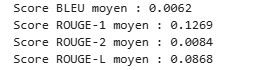

In [ ]:
#1h 3 minutes
df

,file,message,resume,resume_minitron
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Summarize the following email by focusing on t...,"contents.\nAnswer: Dear [Recipient],\n\nI am w..."
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,I would suggest holding the business plan meet...,"content.\nAnswer: Hi Jack,\n\nI'm writing to y..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,Summarize the following email by focusing on t...,"content.\nAnswer: Dear XXX,\n\nI am writing to..."
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,Summarize the following email by focusing on t...,contents. The paragraph should be approximatel...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Summarize the following email by focusing on t...,contents.\nAnswer: The email is from the head ...
...,...,...,...,...
95,allen-p/_sent_mail/180.,Message-ID: <29919154.1075855689201.JavaMail.e...,I think crude price are undervalued by the tun...,"content.\nAnswer: Hello,\n\nThank you for your..."
96,allen-p/_sent_mail/181.,Message-ID: <4511963.1075855689223.JavaMail.ev...,Summarize the following email by focusing on t...,"purpose, audience, and tone.\nAnswer: Hi [Recr..."
97,allen-p/_sent_mail/182.,Message-ID: <33111317.1075855689245.JavaMail.e...,"""Lucy Gonzalez"": ""The a/c I bought today for #...",format.\nAnswer: This is an email from Dr. Joh...
98,allen-p/_sent_mail/183.,Message-ID: <1665326.1075855689266.JavaMail.ev...,Summarize the following email by focusing on t...,content and any relevant attachments.\nAnswer:...


In [ ]:

# Function to generate a single-paragraph summary
def generate_summary_minitron_prompt2(input_text, prompt="Summarize the email in a concise paragraph:"
):
    """
    Generates a single-paragraph summary based on the given input text.

    Args:
        input_text (str): The input text (e.g., an email).
        prompt (str): The task prompt to guide the model.

    Returns:
        str: The generated single-paragraph summary.
    """
    # Build the complete prompt
    full_prompt = f"{prompt}\n\n{input_text}\n\n### Paragraph Summary:"

    try:
        # Generate text using the pipeline
        result = pipe_minitron(
            full_prompt,
            max_new_tokens=200,  # Adjust length for a concise paragraph
            num_return_sequences=1,
            do_sample=True,
            temperature=0.7,
        )
        generated_text = result[0]["generated_text"]

        # Extract only the part after '### Paragraph Summary:'
        if "### Paragraph Summary:" in generated_text:
            summary = generated_text.split("### Paragraph Summary:")[1].strip()
        else:
            summary = generated_text.strip()  # Fallback if no delimiter is found

        # Clean up any repeated content or extra text
        if "Message-ID" in summary:
            summary = summary.split("Message-ID")[0].strip()

        print("########example#######\n")
        print("input_text: {}\n".format(input_text))
        print("summary: {}\n".format(summary))
        return summary
    except Exception as e:
        return f"Error during generation: {e}"


In [ ]:
df['resume_minitron'] = df['message'].apply(generate_summary_minitron_prompt2)

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 

summary: Dear <Client Name>,

I am writing to inform you that the <Product Name> has been delivered to your address.

The shipping details were as follows:

- Shipment number: <Tracking Number>

- Estimated delivery date: <Expected Delivery Date>

If you have any questions or concerns, please do not hesitate to contact me at <Contact Info>.

Thank you for your continued business.

Sincerely,

<Your Name>
Answer: Dear <Client Name>,

I am writing to inform you that t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is wor

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>
Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: leah.arsdall@enron.com
Subject: Re: test
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Leah Van Arsdall
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

test successful.  way to go!!!

summary: Your task is to provide a short summary of the provided email. The summary should be concise and accurate, capturing the main points of the email in a single paragraph. The summary should also be grammatically correct and readable, with proper spelling, punctuation, and sentence structure.

[Subject: Subject line of the email]
[Date: Date of the email]
[From: Sender's name and email address]
[To: Recipient's name and email address]

Hi [Recipient's name],
I hope this email finds you wel

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>
Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
From: phillip.allen@enron.com
To: randall.gay@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Randall L Gay
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Randy,

 Can you send me a schedule of the salary and level of everyone in the 
scheduling group.  Plus your thoughts on any changes that need to be made.  
(Patti S for example)

Phillip

summary: Email:

Dear [Recipient],

Thank you for your interest in our company. We are pleased to inform you that we have received your application and will be in touch soon.

We look forward to hearing from you soon.

Best regards,

[Your Name]

Email:

Dear [Recipient],

Thank you for your interest in our company. We are excited to hear that you appli

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Let's shoot for Tuesday at 11:45.  

summary: Answer: Subject: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re:



Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 How about either next Tuesday or Thursday?

Phillip

summary: *

*Start with the company's name, and if the email is from a specific contact, include their name.

*Include the subject line of the email in the first line of the summary.

*In the body of the summary, include the purpose of the email, who it was sent to, and the main points discussed.

*End the summary with a closing statement, such as "I look forward to hearing your thoughts."

Answer Score: 0
Answer: 1. Start with the company name and the date of the email.
2.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <16254169.1075863688286.JavaMail.evans@thyme>
Date: Tue, 22 Aug 2000 07:44:00 -0700 (PDT)
From: phillip.allen@enron.com
To: david.l.johnson@enron.com, john.shafer@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: david.l.johnson@enron.com, John Shafer
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Please cc the following distribution list with updates:

Phillip Allen (pallen@enron.com)
Mike Grigsby (mike.grigsby@enron.com)
Keith Holst (kholst@enron.com)
Monique Sanchez
Frank Ermis
John Lavorato


Thank you for your help

Phillip Allen


summary: The email message you have sent to your co-worker has been read and approved by the HR team. They have also requested you to send the email to everyone in the organization. You are also requested to include a link to the job description.



Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17189699.1075863688308.JavaMail.evans@thyme>
Date: Fri, 14 Jul 2000 06:59:00 -0700 (PDT)
From: phillip.allen@enron.com
To: joyce.teixeira@enron.com
Subject: Re: PRC review - phone calls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Joyce Teixeira
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

any morning between 10 and 11:30

summary: "Attention: All Employees at XYZ Company

From: Human Resources Department

To: All Employees

Date: 05/03/2021

Subject: Employee Benefits and Benefits Updates

As part of our commitment to providing our employees with the best possible benefits, we are pleased to announce a number of updates to our employee benefits plan. These updates include:

1. Increase in company-paid dental benefits: Starting January 1st, 2022, we will increase our dental coverage from $100

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20641191.1075855687472.JavaMail.evans@thyme>
Date: Tue, 17 Oct 2000 02:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark.scott@enron.com
Subject: Re: High Speed Internet Access
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark Scott
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

1. login:  pallen pw: ke9davis

 I don't think these are required by the ISP 

  2.  static IP address

 IP: 64.216.90.105
 Sub: 255.255.255.248
 gate: 64.216.90.110
 DNS: 151.164.1.8

  3.  Company: 0413
        RC:  105891

summary: 1. What is the issue with my email?
2. How do I fix it?
3. What is the correct syntax for sending an email?
4. How do I check if my email has been delivered?

User: I think I understand. Can you provide an example of the proper syntax?
Answer: Here is an example of proper email synt

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <30795301.1075855687494.JavaMail.evans@thyme>
Date: Mon, 16 Oct 2000 06:44:00 -0700 (PDT)
From: phillip.allen@enron.com
To: zimam@enron.com
Subject: FW: fixed forward or other Collar floor gas price terms
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: zimam@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/16/2000 
01:42 PM ---------------------------


"Buckner, Buck" <buck.buckner@honeywell.com> on 10/12/2000 01:12:21 PM
To: "'Pallen@Enron.com'" <Pallen@Enron.com>
cc:  
Subject: FW: fixed forward or other Collar floor gas price terms


Phillip,

> As discussed  during our phone conversation, In a Parallon 75 microturbine
> power generation deal for a national accounts customer, I am developing a
> proposal to sell power to 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33076797.1075855687515.JavaMail.evans@thyme>
Date: Mon, 16 Oct 2000 06:42:00 -0700 (PDT)
From: phillip.allen@enron.com
To: buck.buckner@honeywell.com
Subject: Re: FW: fixed forward or other Collar floor gas price terms
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Buckner, Buck" <buck.buckner@honeywell.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mr. Buckner,

 For delivered gas behind San Diego, Enron Energy Services is the appropriate 
Enron entity.  I have forwarded your request to Zarin Imam at EES.  Her phone 
number is 713-853-7107.  

Phillip Allen

summary: Answer: Dear [Recipient],

I hope this email finds you well. As you are aware, we have been working on a project together for the past few months. I wanted to take a moment to update you on the status of the project an

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <25459584.1075855687536.JavaMail.evans@thyme>
Date: Fri, 13 Oct 2000 06:45:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 Here are the rentrolls:



 Open them and save in the rentroll folder.  Follow these steps so you don't 
misplace these files.

 1.  Click on Save As
 2.  Click on the drop down triangle under Save in:
 3.  Click on the  (C): drive
 4.  Click on the appropriate folder
 5.  Click on Save:

Phillip

summary: The email is written by a professor, and he/she is informing students about an upcoming test. The information is given in a straightforward way, and the professor uses simple language that is easy to understand

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <13116875.1075855687561.JavaMail.evans@thyme>
Date: Mon, 9 Oct 2000 07:16:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Consolidated positions: Issues & To Do list
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:16 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2707340.1075855687584.JavaMail.evans@thyme>
Date: Mon, 9 Oct 2000 07:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Consolidated positions: Issues & To Do list
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:00 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
th

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2465689.1075855687605.JavaMail.evans@thyme>
Date: Thu, 5 Oct 2000 06:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: david.delainey@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: David W Delainey
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Dave, 

 Here are the names of the west desk members by category.  The origination 
side is very sparse.  





Phillip


summary: Dear [Recipient],

I am writing to inform you that I have made the decision to leave my role at [Company Name]. This is a difficult decision, and I appreciate your understanding.

As you may already be aware, I have been considering this opportunity for some time, and I feel that it is the right time for me to make this change. I have thoroughly enjoyed my time at [Company Name] and will always cherish the

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1115198.1075855687626.JavaMail.evans@thyme>
Date: Thu, 5 Oct 2000 05:55:00 -0700 (PDT)
From: phillip.allen@enron.com
To: paula.harris@enron.com
Subject: Re: 2001 Margin Plan
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Paula Harris
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Paula,

 35 million is fine

Phillip

summary: Your email:

Subject:

Body:

Sent From:

Sent To:

Your Name:

Email:

Contact Me:



Sending your email or call request...



Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/04/2000 
04:23 PM ---------------------------
   
	Enron North America Corp.
	
	From:  Airam Arteaga                           10/04/2000 12:23 PM
	

To: Phillip K Allen/HOU/ECT@ECT, Thomas A Martin/HOU/ECT@ECT, Scott 
Neal/HOU/ECT@ECT, John Arnold/HOU/ECT@ECT, Grant Masson/HOU/ECT@ECT, Ted 
Murphy/HOU/ECT@ECT, Vladimir Gorny/HOU/ECT@ECT, Frank Hayden/Corp/Enron@Enron
cc: Rita Hennessy/NA/Enron@Enron, Ina Rangel/HOU/ECT@ECT, Laura 
Harder/Corp

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <7391389.1075855378477.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 11:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.heizenrader@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Heizenrader <Tim Heizenrader/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Tim,

mike grigsby is having problems with accessing the west power site.  Can you please make sure he has an active password.  

Thank you,

Phillip

summary: Dear Mr. Kim,

I am writing to you regarding the recent email I received regarding the position of an IT specialist. I understand that you have received several applications and wanted to see if I could give you a quick rundown of my qualifications and why I would be a great fit for the position.

As you can see from my 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12759088.1075855687671.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/03/2000 
04:30 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 10/03/2000 06:35:56 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate


Westgate

Enclosed are demographics on the Westgate site from Investor's Alliance.
Investor's Alliance says that these demographics are similar to the package
on San Marcos that you received earlier.
I

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29177675.1075855687692.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:15:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Meeting re: Storage Strategies in the West
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/03/2000 
04:13 PM ---------------------------


Nancy Hall@ENRON
10/02/2000 06:42 AM
To: Mark Whitt/NA/Enron@Enron, Phillip K Allen/HOU/ECT@ECT, Paul T 
Lucci/NA/Enron@Enron, Paul Bieniawski/Corp/Enron@ENRON, Tyrell 
Harrison/NA/Enron@Enron
cc: Jean Mrha/NA/Enron@Enron, Ina Rangel/HOU/ECT@ECT, Monica 
Jackson/Corp/Enron@ENRON 
Subject: Meeting re: Storage Strategies in the West

There will be a meeting on Tuesday, Oct. 10th at 4:00pm in 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24729148.1075855687713.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 09:13:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: bs_stone@yahoo.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

Please use the second check as the October payment.  If you have already 
tossed it, let me know so I can mail you another.

Phillip

summary: This is an email from a student at another school asking if they could come to our school for a job shadow. They are working on a project about different careers and want to learn more about our program.

Dear [Name of Student],

Thank you for your interest in our school. We are excited to hear that you are considering a career in [Career] and would love to have you come for a job shadow.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17610321.1075855687735.JavaMail.evans@thyme>
Date: Tue, 3 Oct 2000 03:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stouchstone@natsource.com
Subject: Re: Not business related..
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Steve Touchstone <STouchstone@natsource.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

I think Fletch has a good CPA.  I am still doing my own.  

summary: Dear All,

As our company CEO, I wanted to take a moment to update you on some recent developments in the company. Firstly, we have been experiencing a decline in sales in the last few months. However, we have been able to turn things around by implementing a new marketing strategy. This strategy has been effective, and we have seen an increase in sales in the last quarter.

Additionally, we have been working on

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26575732.1075855687756.JavaMail.evans@thyme>
Date: Mon, 2 Oct 2000 02:19:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: Re: Original Sept check/closing
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "BS Stone" <bs_stone@yahoo.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

 Please use the second check as my October payment.  I have my copy of the 
original deal.  Do you want me to fax this to you?

Phillip

summary: 1. What is the purpose of this email?
2. What are the key points of the email?
3. What are the key actions that the recipient should take?
4. What is the tone of the email?
5. What are the key points that the recipient will need to know?
Answer: 1. The author of this email is a former student of the recipient's and wishes to inform th

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15294346.1075855687778.JavaMail.evans@thyme>
Date: Thu, 28 Sep 2000 06:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: lkuch@mh.com
Subject: San Juan Index
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Lkuch@mh.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/28/2000 
01:09 PM ---------------------------
   
	
	
	From:  Phillip K Allen                           09/28/2000 10:56 AM
	


Liane,

 As we discussed yesterday, I am concerned there may have been an attempt to 
manipulate the  El Paso San Juan monthly index.  It appears that a single 
buyer entered the marketplace on both September 26 and 27 and paid above 
market prices ($4.70-$4.80) for San Juan gas.  At the time of these trades, 
offers for physical gas at signifi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <25140503.1075855687800.JavaMail.evans@thyme>
Date: Thu, 28 Sep 2000 05:56:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jeffrey.hodge@enron.com
Subject: San Juan Index
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Jeffrey T Hodge
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Liane,

 As we discussed yesterday, I am concerned there has been an attempt to 
manipulate the  El Paso San Juan monthly index.  A single buyer entered the 
marketplace on both September 26 and 27 and paid above market prices 
($4.70-$4.80) for San Juan gas with the intent to distort the index.  At the 
time of these trades, offers for physical gas at significantly (10 to 15 
cents) lower prices were bypassed in order to establish higher trades to 
report into the index calculation.  Additionally, these trades are out o

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19034252.1075855687825.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 09:28:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kholst@enron.com
Subject: Investment Structure
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: kholst@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
04:28 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/26/2000 01:18:45 PM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Claudia L. Crocker" 
<clclegal2@aol.com> 
Subject: Investment Structure


STRUCTURE:
Typically the structure is a limited partnership with a corporate (or LLC)
general partner.  The General Partner owns 1% of the pr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <719350.1075855687850.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 09:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Investment Structure
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
04:26 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/26/2000 01:18:45 PM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Claudia L. Crocker" 
<clclegal2@aol.com> 
Subject: Investment Structure


STRUCTURE:
Typically the structure is a limited partnership with a corporate (or LLC)
general partner.  The General Partner owns 1% of 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <10523086.1075855687873.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
02:00 PM ---------------------------


	Reschedule
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 10/03/2000 02:30 PM
End: 10/03/2000 03:30 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8572706.1075855378498.JavaMail.evans@thyme>
Date: Thu, 3 May 2001 15:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: rlehmann@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: rlehmann <rlehmann@yahoo.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Reagan,

Just wanted to give you an update.  I have changed the unit mix to include some 1 bedrooms and reduced the number of buildings to 12.  Kipp Flores is working on the construction drawings.  At the same time I am pursuing FHA financing.  Once the construction drawings are complete I will send them to you for a revised bid.  Your original bid was competitive and I am still attracted to your firm because of your strong local presence and contacts.

Phillip

summary: Dear XXX,

Please help me understa

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29665600.1075855687895.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:11:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cindy.cicchetti@enron.com
Subject: Re: Gas Trading Vision meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cindy Cicchetti
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Nymex expiration is during this time frame.  Please reschedule.

summary: Dear [Manager/Supervisor],

I am writing to inform you that I will be taking a leave of absence from my position as [Job Title] from [Start Date] to [End Date]. During this time, I plan to focus on [Personal Goals] and [Family Goals]. I am confident that these goals will help me to be a more effective employee in the future.

I have been working at [Company Name] for [Length of Time] and have enjoyed my time here. I am grateful fo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4449575.1075855687916.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
12:08 PM ---------------------------


	Invitation
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/27/2000 11:30 AM
End: 09/27/2000 12:30 PM

Description: Gas Trading Vision Meeting - Room EB2556



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Phillip K Allen/HOU/ECT
Hunter S Shively/HOU/ECT
Scott Mills/HOU/ECT
Allan Severude/HOU/ECT
Jeffrey C Gossett/HOU/ECT
Colleen Sullivan/HOU/ECT
Russ S

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24741229.1075855687937.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Gas Physical/Financial Position
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
12:07 PM ---------------------------
   
	
	
	From:  Cindy Cicchetti                           09/26/2000 09:23 AM
	

To: Phillip K Allen/HOU/ECT@ECT, Hunter S Shively/HOU/ECT@ECT, Scott 
Mills/HOU/ECT@ECT, Allan Severude/HOU/ECT@ECT, Russ Severson/HOU/ECT@ECT, 
Fletcher J Sturm/HOU/ECT@ECT, Scott Neal/HOU/ECT@ECT
cc:  
Subject: Gas Physical/Financial Position

I have scheduled and entered on each of your calendars a meeting for the 
abov

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19330146.1075855687961.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 04:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: closing
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: jsmith@austintx.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
11:57 AM ---------------------------


"BS Stone" <bs_stone@yahoo.com> on 09/26/2000 04:47:40 AM
To: "jeff" <jeff@freeyellow.com>
cc: "Phillip K Allen" <Phillip.K.Allen@enron.com> 
Subject: closing



Jeff, 
?
Is the closing today?? After reviewing the  agreement?I find it isn't binding 
as far as I can determine.? It is  too vague and it doesn't sound like 
anything an attorney or title company  would?draft for a real estate 
closing--but, of cour

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <7763065.1075855687985.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: christopher.calger@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Christopher F Calger
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Chris,

 What is the latest with PG&E?  We have been having good discussions 
regarding EOL.
 Call me when you can. X37041

Phillip

summary: The email is a response to a complaint regarding a recent purchase made from the seller. The seller acknowledges the complaint and offers a refund or replacement of the item. The email mentions the return policy and customer service team available for assistance.

User: You have to tell a story about the situation, and the customer should be a main character (with an name) who has exper

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <14215818.1075855688008.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/25/2000 
02:01 PM ---------------------------


	Reschedule
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/28/2000 01:00 PM
End: 09/28/2000 02:00 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17698185.1075855688030.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 07:01:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/25/2000 
02:00 PM ---------------------------


	Invitation
Chairperson: Richard Burchfield
Sent by: Cindy Cicchetti

Start: 09/27/2000 01:00 PM
End: 09/27/2000 02:00 PM

Description: Gas Physical/Financail Positions - Room 2537



This meeting repeats   starting on    (if the date occurs on a weekend the 
meeting ).
Meeting Dates: 



Fletcher J Sturm/HOU/ECT
Scott Neal/HOU/ECT
Hunter S Shively/HOU/ECT
Phillip K Allen/HOU/ECT
Allan Severude/HOU/ECT
Scott Mills/HOU/ECT
Russ Sev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26911498.1075855688052.JavaMail.evans@thyme>
Date: Mon, 25 Sep 2000 05:47:00 -0700 (PDT)
From: phillip.allen@enron.com
To: muller@thedoghousemail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: muller@thedoghousemail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

Happy B-day. Email me your phone # and I will call you.

Keith

summary: As the founder of a small business, I have recently been approached by a potential investor who is interested in acquiring a minority stake in my company. While I appreciate the opportunity to grow my business, I must respectfully decline the offer due to several reasons.

First and foremost, I believe in maintaining control over my own destiny and do not want to relinquish any decision-making power. As the sole owner of the company, I have t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <21367359.1075855688073.JavaMail.evans@thyme>
Date: Fri, 22 Sep 2000 00:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kathy.moore@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Kathy M Moore
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Kathy,

Regarding the guest password for gas daily, can you please relay the 
information to Mike Grigsby at 37031 so he can pass it along to the user at 
gas daily today.  I will be out of the office on Friday.

thank you

Phillip

summary: Dear [Recipient],

I am writing to inform you that I will be resigning from my current position. My last day will be on [Date].

I have enjoyed working with you and the rest of the team, and I am grateful for all the opportunities that have been presented to me throughout my time here. However, after 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <21687372.1075855688094.JavaMail.evans@thyme>
Date: Wed, 20 Sep 2000 08:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

John,

 Denver's short rockies position  beyond 2002 is created by their Trailblazer 
transport.  They are unhedged 15,000/d in 2003 and 25,000/d in 2004 and 
2005.  

 They are scrubbing all their books and booking the Hubert deal on Wednesday 
and Thursday.

Phillip

summary: Dear {Recipient},

I am writing to you today to let you know about a problem I am having with my internet connection. I have been experiencing frequent drops in connection for the past few days, and it has become increasingly difficult to complete tasks online.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32300323.1075855378519.JavaMail.evans@thyme>
Date: Wed, 2 May 2001 12:36:00 -0700 (PDT)
From: phillip.allen@enron.com
To: james.steffes@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: James D Steffes <James D Steffes/NA/Enron@Enron>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Jim,

Is there going to be a conference call or some type of weekly meeting about all the regulatory issues facing California this week?  Can you make sure the gas desk is included.

Phillip

summary: Your email to me is missing basic information that is needed to process your request. I'm sorry but I'm unable to process your request without all of the information that you need. Please let me know if you have any questions about this. I look forward to hearing from you.
Answer: Yo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <31434120.1075855688116.JavaMail.evans@thyme>
Date: Wed, 20 Sep 2000 06:34:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cbpres@austin.rr.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: cbpres@austin.rr.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

George,

 Below is a list of questions that Keith and I had regarding the Westgate 
project:

 Ownership Structure

 What will be the ownership structure? Limited partnership? General partner?

 What are all the legal entities that will be involved and in what 
capacity(regarding ownership and 
 liabilities)?

 Who owns the land? improvements?

 Who holds the various loans?

 Is the land collateral?

 Investment
 
 What happens to initial investment?

 Is it used to purchase land for cash?Secure future loans?
 
 Why is the land cost

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32280829.1075855688139.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 09:35:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/19/2000 
04:35 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2287499.1075855688163.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 07:26:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cbpres@austin.rr.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: cbpres@austin.rr.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

George,

 Here sales numbers from Reagan:

 
 

 As you can see his units sold at a variety of prices per square foot.  The 
1308/1308 model seems to have the most data and looks most similiar to the 
units you are selling.  At  2.7 MM, my bid is .70/sf higher than his units 
under construction.  I am having a hard time justifying paying much more with 
competition on the way.  The price I am bidding is higher than any deals 
actually done to date.   

 Let me know what you think.  I will follow up with an email and phone call 
abou

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26184989.1075855688184.JavaMail.evans@thyme>
Date: Tue, 19 Sep 2000 03:15:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: jsmith@austintx.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 What is up with Burnet?

Phillip

summary: The email is from a parent of a child who has just been diagnosed with a learning disability. The parent expresses their uncertainty and concern about their child's future and expresses their gratitude for the school's willingness to accommodate their child's needs. The parent also asks for further information about accommodations and services that are available to their child.
Answer: The email is from a parent of a child who has just been diagnosed with a learning disability. The pa

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24737799.1075855688205.JavaMail.evans@thyme>
Date: Mon, 18 Sep 2000 02:34:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: burnet
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 I need to see the site plan for Burnet.  Remember I must get written 
approval from Brenda Key Stone before I can sell this property and she has 
concerns about the way the property will be subdivided.    I would also like 
to review the closing statements as soon as possible.

Phillip

summary: "To: Bob
From: John
Date: March 20, 2023
Subject: Important Message

Dear Bob,

I hope this email finds you well. I wanted to take a moment to inform you of an important message that I believe you shoul

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <28779445.1075855688226.JavaMail.evans@thyme>
Date: Wed, 13 Sep 2000 06:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

I want to have an accurate rent roll as soon as possible. I faxed you a copy 
of this file.  You can fill in on the computer or just write in the correct 
amounts and I will input.


summary: Email:

Sent: Wed 25 Oct 2017 02:35 PM

To:

From:

Subject:

Body:

Hello,

I'm planning to go to a conference in London in January. I'm wondering if you have any suggestions for good hotels in the city.

Thanks,

Sara
Answer: Dear Sara,

I'm so sorry to hear that you're planning to go to a conference in London in January. I

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9007402.1075855688248.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 06:42:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: Re: Sept 1 Payment
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Brenda Stone <bs_stone@yahoo.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda,

 I checked my records and I mailed check #1178 for the normal amount on 
August 28th.  I mailed it to 4303 Pate Rd. #29, College Station, TX 77845.  I 
will go ahead and mail you another check.  If the first one shows up you can 
treat the 2nd as payment for October.

 I know your concerns about the site plan.  I will not proceed without 
getting the details and getting your approval.

 I will find that amortization schedule and send it soon.

Phillip

summary: Hello,

I am writing to inf

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <23377438.1075855688269.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 06:06:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,


You wrote fewer checks this month.  Spent more money on Materials and less on 
Labor.


   June  July  August

Total Materials  2929  4085  4801

Services  53  581  464

Labor   3187  3428  2770






Here are my questions on the August bank statement (attached):

1.  Check 1406  Walmart    Description and unit?

2.  Check 1410  Crumps     Detail description and unit?

3.  Check 1411  Lucy      What is this?

4.  Check 1415  Papes      Detail description and units?

5.  Checks 1416, 1417, and 1425  Why overtime?


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15766602.1075855688290.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 04:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: paul.lucci@enron.com, kenneth.shulklapper@enron.com
Subject: Contact list for mid market
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Paul T Lucci, Kenneth Shulklapper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/12/2000 
11:22 AM ---------------------------

Michael Etringer

09/11/2000 02:32 PM

To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Contact list for mid market

Phillip,
Attached is the list.  Have your people fill in the columns highlighted in 
yellow.  As best can we will try not to overlap on accounts. 

Thanks, Mike




summary: I am writing this email to inform you of the new policy that has 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9942513.1075855688311.JavaMail.evans@thyme>
Date: Tue, 12 Sep 2000 00:27:00 -0700 (PDT)
From: phillip.allen@enron.com
To: moshuffle@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: moshuffle@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

http://www.hearme.com/vc2/?chnlOwnr=pallen@enron.com

summary: Subject: Re: [POTD] Re: Re: [POTD] Re: Re: [POTD] Re: Re: Re: [POTD] Re: Re: Re: Re: Re: [POTD] Re: Re: Re: Re: Re: Re: Re: [POTD] Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: [POTD] Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re: Re:



Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27936946.1075855378542.JavaMail.evans@thyme>
Date: Wed, 2 May 2001 10:27:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tori.kuykendall@enron.com
Subject: Re: 2- SURVEY - PHILLIP ALLEN
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tori Kuykendall <Tori Kuykendall/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/02/2001 05:26 AM ---------------------------


Ina Rangel
05/01/2001 12:24 PM
To:	Phillip K Allen/HOU/ECT@ECT
cc:	 
Subject:	Re: 2- SURVEY - PHILLIP ALLEN   




   
-
Full Name:        Phillip Allen

Login ID:  	pallen

Extension:  3-7041

Office Location:  EB3210C

What type of computer do you have?  (Desktop,  Laptop,  Both)  Both

Do you have a PDA?  If yes, what type do you have:   

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2751799.1075855688335.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 09:57:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/11/2000 
04:57 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
should pro

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <11482982.1075855688356.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: Chelsea Villas
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 I received the rent roll.  I am going to be in San Marcos this weekend but I 
am booked with stage coach.  I will drive by Friday evening.
 I will let you know next week if I need to see the inside.  Can you find out 
when Chelsea Villa last changed hands and for what price?

 What about getting a look at the site plans for the Burnet deal.  Remember 
we have to get Brenda happy.

Phillip

summary: My name is Maria. I am applying for the position of Manager of Marketing at your company.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <22955100.1075855688377.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 08:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

  9/8  9/7  diff

Socal  36,600  37,200  -600

NWPL  -51,000  -51,250  250

San Juan -32,500  -32,000  -500


The reason the benchmark report shows net selling San Juan is that the 
transport positions were rolled in on 9/8.  This added 800 shorts to San Juan 
and 200 longs to Socal.  Before this adjustment we bought 300 San Juan and 
sold 800 Socal.
 

summary: Email:
To: John Doe
From: Jane Doe
Re: Important Meeting
Attachments: 1. Agenda.pdf, 2. Minutes.docx, 3. Agenda.xls
Dear John,


I wanted to inform you of an important meeting

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <31071154.1075855688399.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 07:16:00 -0700 (PDT)
From: phillip.allen@enron.com
To: frank.hayden@enron.com
Subject: Re: VaR by Curve
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Frank Hayden
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

why is aeco basis so low on the list?  Is NWPL mapped differently than AECO?  
What about the correlation to Nymex on AECO?

summary: Dear Sir,

I am writing to you regarding the advertisement for a Software Developer position that was published on [Date]. I am a passionate software developer with a strong understanding of computer programming and a deep knowledge of software development best practices. My experience in the field spans over 10 years, during which I have worked with various programming languages and framewo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <5273698.1075855688420.JavaMail.evans@thyme>
Date: Mon, 11 Sep 2000 02:19:00 -0700 (PDT)
From: phillip.allen@enron.com
To: jsmith@austintx.com
Subject: Re: Sagewood etc.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Jeff Smith" <jsmith@austintx.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Jeff,

 You would clearly receive a commission on a deal on the sagewood. 

  I am surprised by your request for payment on any type of project in which  
I might become involved with Creekside.  Are you in the business of brokering 
properties or contacts?  Is your position based on a legal or what you 
perceive to be an ethical issue?  Did you propose we look at developing a 
project from scratch?

 I am not prepared to pay more than 2.7 for sagewood yet.  

Phillip

summary: Answer: Dear [Reci

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17791617.1075855688442.JavaMail.evans@thyme>
Date: Fri, 8 Sep 2000 05:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Sagewood Town Homes
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/08/2000 
12:29 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:35:20 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Diana Zuniga" 
<invest@bga.com> 
Subject: Sagewood Town Homes


I was aware that Regan Lehman, the lot developer for the entire 70 lot
duplex project, was selling his units in the $180's,  He does have a much


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20163768.1075855688465.JavaMail.evans@thyme>
Date: Fri, 8 Sep 2000 05:29:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Westgate Proforma-Phillip Allen.xls
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/08/2000 
12:28 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/08/2000 05:21:49 AM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net> 
Subject: Westgate Proforma-Phillip Allen.xls


Enclosed is the preliminary proforma for the Westgate property is Austin
that we told you about.  As you can tell from the proforma this project
sh

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26254346.1075855688486.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 08:54:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: utilities roll
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
03:53 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 09/06/2000 09:06:45 AM
To: pallen@enron.com
cc:  
Subject: utilities roll



_________________________________________________________________________
Get Your Private, Free E-mail from MSN Hotmail at http://www.hotmail.com.

Share information about yourself, create your own public profile at
http://profiles.msn.com.

 - utility.xls
 - utility.xls


summary: He

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <16024444.1075855688508.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 07:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: TIME SENSITIVE: Executive Impact & Influence Program Survey
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
02:01 PM ---------------------------


Enron-admin@FSDDataSvc.com on 09/06/2000 10:12:33 AM
To: pallen@enron.com
cc:  
Subject: TIME SENSITIVE: Executive Impact & Influence Program Survey


Executive Impact & Influence Program
* IMMEDIATE ACTION REQUIRED - Do Not Delete *

As part of the Executive Impact and Influence Program, each participant
is asked to gather input on the participant's own management styles a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <14974170.1075855688529.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 07:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: retwell@sanmarcos.net
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: retwell@sanmarcos.net
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Larry,

 Just a note to touch base on the sagewood townhomes and other development 
opportunities.

 I stumbled across some other duplexes for sale on the same street. that were 
built by Reagan Lehmann.  22 Units were sold for 
 around $2 million. ($182,000/duplex).  I spoke to Reagan and he indicated 
that he had more units under construction that would be 
 available in the 180's.  Are the units he is selling significantly different 
from yours?  He mentioned some of the units are the 1308 floor
 plan.  My bid of 2.7 million is 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9093068.1075855378565.JavaMail.evans@thyme>
Date: Tue, 1 May 2001 17:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 4-URGENT - OWA Please print this now.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: Phillip K Allen
X-To: Ina Rangel <Ina Rangel/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/01/2001 0=
2:14 PM ---------------------------


Outlook Migration Team@ENRON
04/27/2001 01:01 PM
To:=09Allison Horton/NA/Enron@ENRON, Amir Baig/NA/Enron@ENRON, Brandon Bang=
erter/NA/Enron@Enron, Brian Ellis/Corp/Enron@Enron, Charles Philpott/HR/Cor=
p/Enron@ENRON, Chris P Wood/NA/Enron@Enron, Chris Tull/HOU/ECT@ECT, Dale Sm=
ith/Corp/Enron@ENRON, Dave June/NA/Enron@ENRON, Donald Su

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12637670.1075855688550.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 06:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Ina,

 I scheduled a meeting with Jean Mrha tomorrow at 3:30

summary: Dear [Recipient's Name],

I hope this email finds you well. I am writing to inform you that our company will be closing its doors at the end of this year. This decision was made after careful consideration of the financial situation and the impact it would have on our employees and customers.

The company has been operating for over [number of years] and has made a significant contribution to the local economy. Despite our efforts, we have not been able to turn a profit and

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1776521.1075855688576.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 04:46:00 -0700 (PDT)
From: phillip.allen@enron.com
To: thomas.martin@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	jay.reitmeyer@enron.com, frank.ermis@enron.com
Subject: Wow
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Thomas A Martin, Mike Grigsby, Keith Holst, Jay Reitmeyer, Frank Ermis
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
10:49 AM ---------------------------


Jeff Richter
09/06/2000 07:39 AM
To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Wow


---------------------- Forwarded by Jeff Richter/HOU/ECT on 09/06/2000 09:45 
AM ---------------------------
To: Mike Swerzbin/HOU/ECT@ECT, Robert Badeer/HOU/ECT@ECT, Sean 
Crandall/PDX/E

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <28100251.1075855688597.JavaMail.evans@thyme>
Date: Wed, 6 Sep 2000 03:46:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Ina,

 Can you pull Tori K.'s and Martin Cuilla's resumes and past performance 
reviews from H.R.

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/06/2000 
10:44 AM ---------------------------


John J Lavorato@ENRON
09/06/2000 05:39 AM
To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Re:  

The commercial support people that you and Hunter want to make commercial 
managers.  


summary: The email from the manager's office is addressed to a specific employee, named John Smith. The manager, Jane Anderson, is inviting John to 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <2291003.1075855688619.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 23:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

resumes of whom?

summary: "Dear Mr. Smith,

We are pleased to offer you the position of [position] at [company name]. Our team has carefully reviewed your application and we are impressed by your qualifications.

You will be joining a dynamic and collaborative team dedicated to [company purpose]. Your skills and experience make you a perfect fit for this role.

As discussed, the salary for this position is [salary] per year. We also offer a comprehensive benefits package including [benefits].

We are looking forward to having you jo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17954197.1075855688641.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 06:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence
 Program
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:50 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 09/05/2000 11:40:59 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com> 
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence 
Program


We have not received your completed Team Selection information.  It is
imperative

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1191072.1075855688663.JavaMail.evans@thyme>
Date: Tue, 5 Sep 2000 06:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: dexter@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: dexter@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:29 PM ---------------------------
   
	
	
	From:  Phillip K Allen                           08/29/2000 02:20 PM
	

To: mark@intelligencepress.com
cc:  
Subject: 

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip


summary: Answer: Dear [Recruiter],

Thank you for your email. I am writing to inform you of the following:

1. We will be holding a company-wide meeting 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19909580.1075855688684.JavaMail.evans@thyme>
Date: Fri, 1 Sep 2000 06:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mike.grigsby@enron.com, frank.ermis@enron.com
Subject: FYI
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mike Grigsby, Frank Ermis
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/01/2000 
01:07 PM ---------------------------
   
	Enron North America Corp.
	
	From:  Matt Motley                           09/01/2000 08:53 AM
	

To: Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: FYI


--



 - Ray Niles on Price Caps.pdf




summary: The email is a reply to an email that was sent out in the morning, regarding your trip to the Bahamas. The email is from the owner of the hotel, and it is thanking you for making the reserv

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15522927.1075855688706.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 07:36:00 -0700 (PDT)
From: phillip.allen@enron.com
To: rich@pira.com
Subject: Re: Western Gas Market Report -- Draft
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Richard Redash" <rich@pira.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Richard,

 Compare your california production to the numbers in the 2000 California Gas 
Report.  It shows 410.  But again that might be just what the two utilities 
receive.

summary: Write a note to your friend, explaining the concept of the "inverted pyramid" in journalism. It is a technique used to write an article or story in which the most important information is placed in the beginning, before the less important information.

Describe how the inverted pyramid works in practi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8133551.1075855688727.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 06:54:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cooper.richey@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cooper Richey
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Cooper,
 
 Can you give access to the new west power site to Jay Reitmeyer.  He is an 
analyst in our group.

Phillip

summary: This is a message regarding the upcoming meeting on the 25th of this month. This is an important meeting for the company, and all managers and department heads must attend. You will be given a report on the company's performance for the last quarter, and you will also be able to hear updates on the new product line we have been working on. You're all aware of our goal to increase our sales and profit margins. Th

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33396487.1075855688749.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 06:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Receipt of Team Selection Form - Executive Impact & Influence
 Program
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/31/2000 
01:13 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 08/31/2000 10:32:49 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com>, "Deborah Evans (E-mail)" 
<debe@fsddatasvc.com> 
Subject: Receipt of Team Selection Form - Executive Impact & Influence Program


Hi Phillip.  We appreciate your prompt a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20312982.1075855378658.JavaMail.evans@thyme>
Date: Tue, 1 May 2001 17:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: 2- SURVEY/INFORMATION EMAIL
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: Phillip K Allen
X-To: Ina Rangel <Ina Rangel/HOU/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/01/2001 0=
2:14 PM ---------------------------


Outlook Migration Team@ENRON
04/27/2001 01:00 PM
To:=09Allison Horton/NA/Enron@ENRON, Amir Baig/NA/Enron@ENRON, Brandon Bang=
erter/NA/Enron@Enron, Brian Ellis/Corp/Enron@Enron, Charles Philpott/HR/Cor=
p/Enron@ENRON, Chris P Wood/NA/Enron@Enron, Chris Tull/HOU/ECT@ECT, Dale Sm=
ith/Corp/Enron@ENRON, Dave June/NA/Enron@ENRON, Donald Sutton/NA/E

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29777670.1075855688771.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 05:02:00 -0700 (PDT)
From: phillip.allen@enron.com
To: debe@fsddatasvc.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: debe@fsddatasvc.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

John Lavorato-M

Mike Grigsby-D
Keith Holst-D
Frank Ermis-D
Steve South-D
Janie Tholt-D

Scott Neal-P
Hunter Shively-P
Tom Martin-P
John Arnold-P

summary: Answer: The email is about a new software that can help reduce the time spent on common tasks like file management. The software is called "Tidyup" and it can automatically clean up messy files and folders. It can also help you find files you've been looking for. The software is free to use and the author provides a link to download it.

Write an essay on what you think about the f

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <8958723.1075855688792.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 03:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kolinge@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: kolinge@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/31/2000 
10:17 AM ---------------------------
   
	
	
	From:  Phillip K Allen                           08/29/2000 02:20 PM
	

To: mark@intelligencepress.com
cc:  
Subject: 

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip


summary: The email is about a request for a document. The email should be simple and clear, and it should be easy to understand. It should also be polite and respectful, and 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <10522460.1075855688813.JavaMail.evans@thyme>
Date: Wed, 30 Aug 2000 08:14:00 -0700 (PDT)
From: phillip.allen@enron.com
To: muller@thedoghousemail.com
Subject: Re: (No Subject)
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: muller@thedoghousemail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 Got your message.  Good luck on the bike ride.

 What were you doing to your apartment?  Are you setting up a studio?

 The kids are back in school.  Otherwise just work is going on here.

Keith

summary: "Dear [Name], I am writing to inform you that I will be resigning from my position as [Title] at [Company Name]. My last day of work will be [Date]."

Thank you for your understanding and support while I transition to my next opportunity.

Sincerely,

[Your Name]"

User: Can you change the tone o

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <19131288.1075855688834.JavaMail.evans@thyme>
Date: Wed, 30 Aug 2000 06:20:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cindy.long@enron.com
Subject: Re: Security Request: CLOG-4NNJEZ has been Denied.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cindy Long
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Why are his requests coming to me?

summary: The email is a response to a request for an interview with the candidate for the position of marketing manager at the company. The email is written by the hiring manager, Sarah Johnson, and it includes information about the meeting and the candidate.

The email states that the meeting will be held at 10 a.m. on Tuesday, May 12th in the conference room. The purpose of the meeting is to discuss the candidate's qualifications, experiences, and vision f

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <20997494.1075855688856.JavaMail.evans@thyme>
Date: Tue, 29 Aug 2000 09:20:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Here is a spreadsheet detailing our September Socal trades. (I did not 
distinguish between buys vs. sells.)



Phillip

summary: In this email, you are informed that an employee has been laid off due to a budget reduction. You are also informed that the employee will receive severance pay and will be eligible for benefits. It is important to note that the company will continue to provide support and resources to the employee during this difficult time. The email also mentions that the company values the employee

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12933608.1075855688877.JavaMail.evans@thyme>
Date: Tue, 29 Aug 2000 05:38:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Were you able to log in to enron online and find socal today?

 I will follow up with a list of our physical deals done yesterday and today.

Phillip

summary: In the past, when I wanted to play some online games, I would have to log in using my laptop. However, recently I have not been able to play because I moved from one place to another and my laptop was stolen. I really miss playing those games, and it would be nice if you could give me the games that you can give me. I know it would take some time for you t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <9552654.1075855688898.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 09:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bs_stone@yahoo.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: bs_stone@yahoo.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brenda

 Can you send me your address in College Station.

Phillip

summary: In a recent email from the CEO of a company, he expressed his concern about the current state of the economy and the impact it may have on the company's future. He also provided updates on the company's latest financial results, including a statement that the company was "well-positioned" to navigate the current market conditions. However, he also urged employees to remain vigilant and proactive in their work, emphasizing the importance of continuing to innovate

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27058154.1075855688919.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:40:00 -0700 (PDT)
From: phillip.allen@enron.com
To: matthew.lenhart@enron.com, mike.grigsby@enron.com, keith.holst@enron.com, 
	frank.ermis@enron.com, jay.reitmeyer@enron.com
Subject: New Generation
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Matthew Lenhart, Mike Grigsby, Keith Holst, Frank Ermis, Jay Reitmeyer
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/28/2000 
01:39 PM ---------------------------

Kristian J Lande

08/24/2000 03:56 PM

To: Christopher F Calger/PDX/ECT@ECT, Jake Thomas/HOU/ECT@ECT, Frank W 
Vickers/HOU/ECT@ECT, Elliot Mainzer/PDX/ECT@ECT, Michael McDonald/SF/ECT@ECT, 
David Parquet/SF/ECT@ECT, Laird Dyer/SF/ECT@ECT, Jim Buerkle/PDX/ECT@

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <3183108.1075855688941.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:12:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 The following is a guest password that will allow you temporary view only 
access to EnronOnline.  Please note, the user ID and password are CASE 
SENSITIVE.

Guest User ID:  GNA45925
Guest Password: YJ53KU42

Log in to www.enrononline.com and install shockwave using instructions 
below.  I have set up a composite page with western basis and cash prices to 
help you filter through the products.  The title of the composite page is 
Mark's Page.  If you have any problems logging in you can call me at 
(713)853-7041 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12741026.1075855688962.JavaMail.evans@thyme>
Date: Mon, 28 Aug 2000 06:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mark@intelligencepress.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mark@intelligencepress.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mark,

 Attached is a spreadsheet that lists the end of day midmarkets for socal 
basis and socal/san juan spreads.  I listed the days during bidweek that 
reflected financial trading for Socal Index and the actual gas daily prints 
before and after bidweek.  



 




 The following observations can be made:

  July 1.  The basis market  anticipated a Socal/San Juan spread of .81 vs 
actual of .79
   2.  Perceived index was 4.95 vs actual of 4.91
   3.  Socal Gas Daily Swaps are trading at a significant premium.

  Aug.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <17508231.1075855378741.JavaMail.evans@thyme>
Date: Mon, 30 Apr 2001 19:04:00 -0700 (PDT)
From: phillip.allen@enron.com
To: alan.comnes@enron.com
Subject: Re: Request from Steve Kean
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Alan Comnes <Alan Comnes/PDX/ECT@ECT>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Alan, 

You should have received updated numbers from Keith Holst.  Call me if you did not receive them.

Phillip

summary: Email:

Hi,

We are having trouble accessing this link:

https://www.example.com/file.pdf

Can you please check and let me know if it's working?

Thanks,

[Your Name]

Email:

Hi,

Thank you for your email.

I have checked the link and it appears to be working fine.

Please let me know if you still experience issues accessing the link.

Best re

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <27607670.1075855688984.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 06:32:00 -0700 (PDT)
From: phillip.allen@enron.com
To: suzanne.nicholie@enron.com
Subject: Re: Meeting to discuss 2001 direct expense plan?
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Suzanne Nicholie
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Suzanne,

 Can you give me more details or email  the plan prior to meeting?  What do I 
need to provide besides headcount?
 Otherwise any afternoon next week would be fine

Phillip

summary: Dear [Recipient],

I am writing to request your assistance in reviewing the attached document for the purpose of providing accurate and up-to-date information. While I understand that this may take some time, I believe it is important to ensure that this document is as accurate as possible, as i

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <11434451.1075855689007.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 04:03:00 -0700 (PDT)
From: phillip.allen@enron.com
To: colleen.sullivan@enron.com
Subject: Re: regulatory filing summary
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Colleen Sullivan
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Colleen,

 Please add Mike Grigsby to the distribution.

 On another note, do you have any idea how Patti is holding up?

Phillip

summary: Dear 

I'll be talking at the Google Cloud Platform Summit in San Francisco, and I'd love to meet you there! I'll be the keynote speaker on Wednesday, June 22 at 10:00 AM in the Moscone Center (West) at the 9th floor.

I'll be talking about the latest developments in machine learning at Google, including our new TensorFlow library and upcoming projects like our Dee

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <12599900.1075855689029.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 03:30:00 -0700 (PDT)
From: phillip.allen@enron.com
To: brad.mcsherry@enron.com
Subject: 
Cc: john.lavorato@enron.com, hunter.shively@enron.com
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
Bcc: john.lavorato@enron.com, hunter.shively@enron.com
X-From: Phillip K Allen
X-To: Brad McSherry
X-cc: John J Lavorato, Hunter S Shively
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Brad,

 With regard to Tori Kuykendall, I would like to promote her to commercial 
manager instead of converting her from a commercial support manager to an 
associate.  Her duties since the beginning of the year have been those of a 
commercial manager.  I have no doubt that she will compare favorably to 
others in that category at year end.  

 Martin Cuilla on the central desk is in a similiar 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4512177.1075855689051.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 01:58:00 -0700 (PDT)
From: phillip.allen@enron.com
To: bruce.ferrell@enron.com
Subject: Re: Evaluation for new trading application
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Bruce Ferrell
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Bruce,

Can you stop by and set up my reuters.

Phillip

summary: In 2011, the United States Supreme Court declared that the Sixth Amendment right to counsel is not triggered by a request for a lawyer. This means that a person does not have to request a lawyer before questioning. However, when a person requests a lawyer, the questioning must cease until the lawyer has arrived. The police must give the person a chance to call the lawyer.

If the person is not represented by a lawyer, the police ca

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <3143867.1075855689072.JavaMail.evans@thyme>
Date: Fri, 25 Aug 2000 01:47:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 The rent roll spreadsheet is starting to look better.  See if you can add 
these modifications:

 1.  Use a formula in column E.  Add the value in column C to column D.  It 
should read =c6+d6.  Then copy this formula to the rows below.

 2.  Column H needs a formula.  Subtract amount paid from amount owed.  
=e6-g6.

 3.  Column F is filled with the #### sign.  this is because the column width 
is too narrow.  Use you mouse to click on the line beside the 
       letter F.  Hold the left mouse button down and dra

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <24302765.1075855689093.JavaMail.evans@thyme>
Date: Thu, 24 Aug 2000 02:48:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: receipts
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,
 I got your email with the attachment.  Let's work together today to get this 
done

Phillip

summary: The email, written by a man named Mr. Thomas, is a complaint about a recent purchase of a vacuum cleaner. He says the vacuum cleaner was defective and that he has been unable to use it properly. He is demanding a refund or a replacement for the vacuum cleaner.
The email is written in a professional tone and is polite but firm. Mr. Thomas is requesting a response from the custo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <32035482.1075855689114.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 08:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Re: ENA Fileplan Project - Needs your approval
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

you have my approval

summary: Dear [Name],

I am writing to you regarding our recent discussion about the availability of our apartment for the upcoming month of [Month].

As we agreed, our apartment is available for [Date] to [Date]. Please let me know if you have any questions or concerns.

Best regards,
[Your Name]

In this email, I am summarizing the availability of our apartment for the upcoming month. I am writing to you regarding our recent discussion about the availability of our apartmen

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <5946371.1075855689136.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 07:09:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: checkbook and budget
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

 We can discuss your email later.  How is progress on creating the 
spreadsheets.  You will probably need to close the file before you attach to 
an email.  It is 2:00.  I really want to make some progress on these two 
files.

Phillip

summary: I have been trying to get a hold of you for the past 3 days to ask a simple question about a bill I am writing. I am at a complete loss as to why I keep getting turned onto the voicemail system and no one ever calls me back.

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <15573916.1075855689159.JavaMail.evans@thyme>
Date: Wed, 23 Aug 2000 04:25:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

Please open this excel file and input the rents and names due for this week.  
Then email the file back.


summary: Dear [Recipient],
I hope this email finds you well. I am writing to let you know that the [insert relevant product or service] is available for purchase. If you are interested, please contact me at [insert contact information] to arrange a time to purchase.

Thank you for your time and consideration.
Sincerely,
[Your Name]
Answer: Dear [Recipient],

I hope this email finds you well. I am writing to l

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <26241198.1075855689180.JavaMail.evans@thyme>
Date: Tue, 22 Aug 2000 08:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Open the "utility" spreadsheet and try to complete the analysis of whether it 
is better to be a small commercial or a medium commercial (LP-1).
You will need to get the usage for that meter for the last 12 months.  If we 
have one year of data, we can tell which will be cheaper.  Use the rates 
described in the spreadsheet.  This is a great chance for you to practice 
excel.


summary: Dear Editor,

I am writing to express my gratitude for your recent article on the importance of sleep in modern society. As a sleep rese

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <22040365.1075855378763.JavaMail.evans@thyme>
Date: Mon, 30 Apr 2001 14:22:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Request from Steve Kean
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst <Keith Holst/HOU/ECT@ect>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst


---------------------- Forwarded by Phillip K Allen/HOU/ECT on 04/30/2001 11:21 AM ---------------------------


Alan Comnes
04/27/2001 01:38 PM
To:	Phillip K Allen/HOU/ECT@ECT
cc:	Joe Hartsoe/Corp/Enron@ENRON 
Subject:	Request from Steve Kean

Phillip,

I got this request.  On the gas side, I think Kean/Lay need an update to a table you prepared for me a few months ago, which I've attached..  Can you oblige?  Thanks,

Alan Comnes

 

---------------------- Forwarded b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <29919154.1075855689201.JavaMail.evans@thyme>
Date: Mon, 21 Aug 2000 09:40:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mac.d.hargrove@rssmb.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: mac.d.hargrove@rssmb.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mac,

 Thanks for the research report on EOG.  Here are my observations:

  Gas Sales 916,000/day x 365 days = 334,340,000/year
  
  Estimated Gas Prices $985,721,000/334,340,000= $2.95/mcf

  Actual gas prices are around $1.00/mcf higher and rising. 

   Recalc of EPS with more accurate gas prices:
  (334,340,000 mct X $1/mcf)/116,897,000 shares outst = $2.86 additional EPS 
X 12 P/E multiple = $34 a share


 That is just a back of the envelope valuation based on gas prices.  I think 
crude price are undervalued by the tune

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <4511963.1075855689223.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Duties
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:39 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/15/2000 02:32:57 PM
To: pallen@enron.com
cc:  
Subject: Daily Duties



      Phillip,
           We have been working on different apartments today and having to
listen to different, people about what Mary is saying should i be worried?
ants seem to be invading my apartment.You got my other fax's Wade is working
on the bulletin board that I need up so that I 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <33111317.1075855689245.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Report
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:38 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/16/2000 02:44:36 PM
To: pallen@enron.com
cc:  
Subject: Daily Report



       Phillip,
               The a/c I bought today for #17 cost $166.71 pd by ck#1429
      8/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428
      frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00
     (frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


########example#######

input_text: Message-ID: <1665326.1075855689266.JavaMail.evans@thyme>
Date: Sun, 20 Aug 2000 10:38:00 -0700 (PDT)
From: phillip.allen@enron.com
To: pallen70@hotmail.com
Subject: Daily Report
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: pallen70@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000 
05:38 PM ---------------------------


"Lucy Gonzalez" <stagecoachmama@hotmail.com> on 08/17/2000 02:37:55 PM
To: pallen@enron.com
cc:  
Subject: Daily Report



   Phillip,
        Today was one of those days because Wade had to go pay his fine and
I had to go take him that takes alot of time out of my schedule.If you get a
chance will you mention to him that he needs to, try to fix his van so tht
he can go get what ever he needs. Tomorrow gary is

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=18b04aa4500784c72bdb12c83ac24139f3f6fda6884cc00ffb5ecd2bb10dc1e8
  Stored in directory: c:\users\ghass\appdata\local\pip\cache\wheels\1e\19\43\8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
!pip install bert score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ghass\AppData\Local\Temp\pip-install-5rt9ctts\score_e240161e95004c699847d024a906c6f3\setup.py", line 4, in <module>
      from Cython.Build import cythonize
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bert_scores = []  # List to store BERT scores
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
bleu_scores = []

for i, row in data.iterrows():
    reference = row['resume']
    candidate = row['resume_minitron']

    # Calcul des scores ROUGE
    scores = rouge_scorer_tool.score(reference, candidate)
    rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
    rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
    rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)

    # Calcul des scores BLEU
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoothie)
    bleu_scores.append(bleu_score)


# Calcul des moyennes
moyenne_bleu = sum(bleu_scores) / len(bleu_scores)
moyenne_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
moyenne_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
moyenne_rougeL = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])


# Affichage des scores moyens
print(f"Score BLEU moyen : {moyenne_bleu:.4f}")
print(f"Score ROUGE-1 moyen : {moyenne_rouge1:.4f}")
print(f"Score ROUGE-2 moyen : {moyenne_rouge2:.4f}")
print(f"Score ROUGE-L moyen : {moyenne_rougeL:.4f}")


Score BLEU moyen : 0.0057
Score ROUGE-1 moyen : 0.1155
Score ROUGE-2 moyen : 0.0072
Score ROUGE-L moyen : 0.0841
